In [ ]:
#merge dcd trajectory files into one with 100ns

import MDAnalysis as mda
from MDAnalysis.coordinates.DCD import DCDWriter

u1 = mda.Universe("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/step5_production.dcd")
u2 = mda.Universe("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/step6_production.dcd")
u3 = mda.Universe("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/step7_production.dcd")
u4 = mda.Universe("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/step8_production.dcd")
u5 = mda.Universe("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/step9_production.dcd")
u6 = mda.Universe("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/step10_production.dcd")


output_path = "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/st18_bictegravir_total_100ns.dcd"

with DCDWriter(output_path, u1.trajectory.n_atoms) as w:
    print("Writing u1 trajectory...")
    for ts in u1.trajectory:
        w.write(u1.atoms)
    print("Finished writing u1 trajectory.")
    
    print("Writing u2 trajectory...")
    for ts in u2.trajectory:
        w.write(u2.atoms)
    print("Finished writing u2 trajectory.")

    print("Writing u3 trajectory...")
    for ts in u3.trajectory:
        w.write(u3.atoms)
    print("Finished writing u3 trajectory.")

    print("Writing u4 trajectory...")
    for ts in u4.trajectory:
        w.write(u4.atoms)
    print("Finished writing u4 trajectory.")

    print("Writing u5 trajectory...")
    for ts in u5.trajectory:
        w.write(u5.atoms)
    print("Finished writing u5 trajectory.")

    print("Writing u6 trajectory...")
    for ts in u6.trajectory:
        w.write(u6.atoms)
    print("Finished writing u6 trajectory.")

   
print(f"Combined DCD file saved at {output_path}")



# Load the merged DCD file
merged_universe = mda.Universe("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/st18_bictegravir_total_100ns.dcd")

# Check the number of frames in the merged file
num_frames = len(merged_universe.trajectory)
print(f"The merged DCD file contains {num_frames} frames.")

# Check the number of atoms in the merged file
num_atoms = merged_universe.trajectory.n_atoms
print(f"The merged DCD file contains {num_atoms} atoms per frame.")


# Load the merged DCD file
merged_universe = mda.Universe("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/st18_bictegravir_total_100ns.dcd")

# Define the output path for the reduced DCD file
output_path = "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/st18_bictegravir_reduced_100ns.dcd"

# Initialize the DCDWriter with the same number of atoms
with DCDWriter(output_path, merged_universe.trajectory.n_atoms) as w:
    # Write only the first 1000 frames to the new DCD file
    for i, ts in enumerate(merged_universe.trajectory):
        if i < 1000:
            w.write(merged_universe.atoms)
        else:
            break

print(f"Reduced DCD file saved at {output_path} with 1000 frames representing 100 nanoseconds.")


🔬 Starting analysis of drug-protein complexes...



Drugs:   0%|          | 0/7 [00:00<?, ?it/s]

✅ Analysis complete.


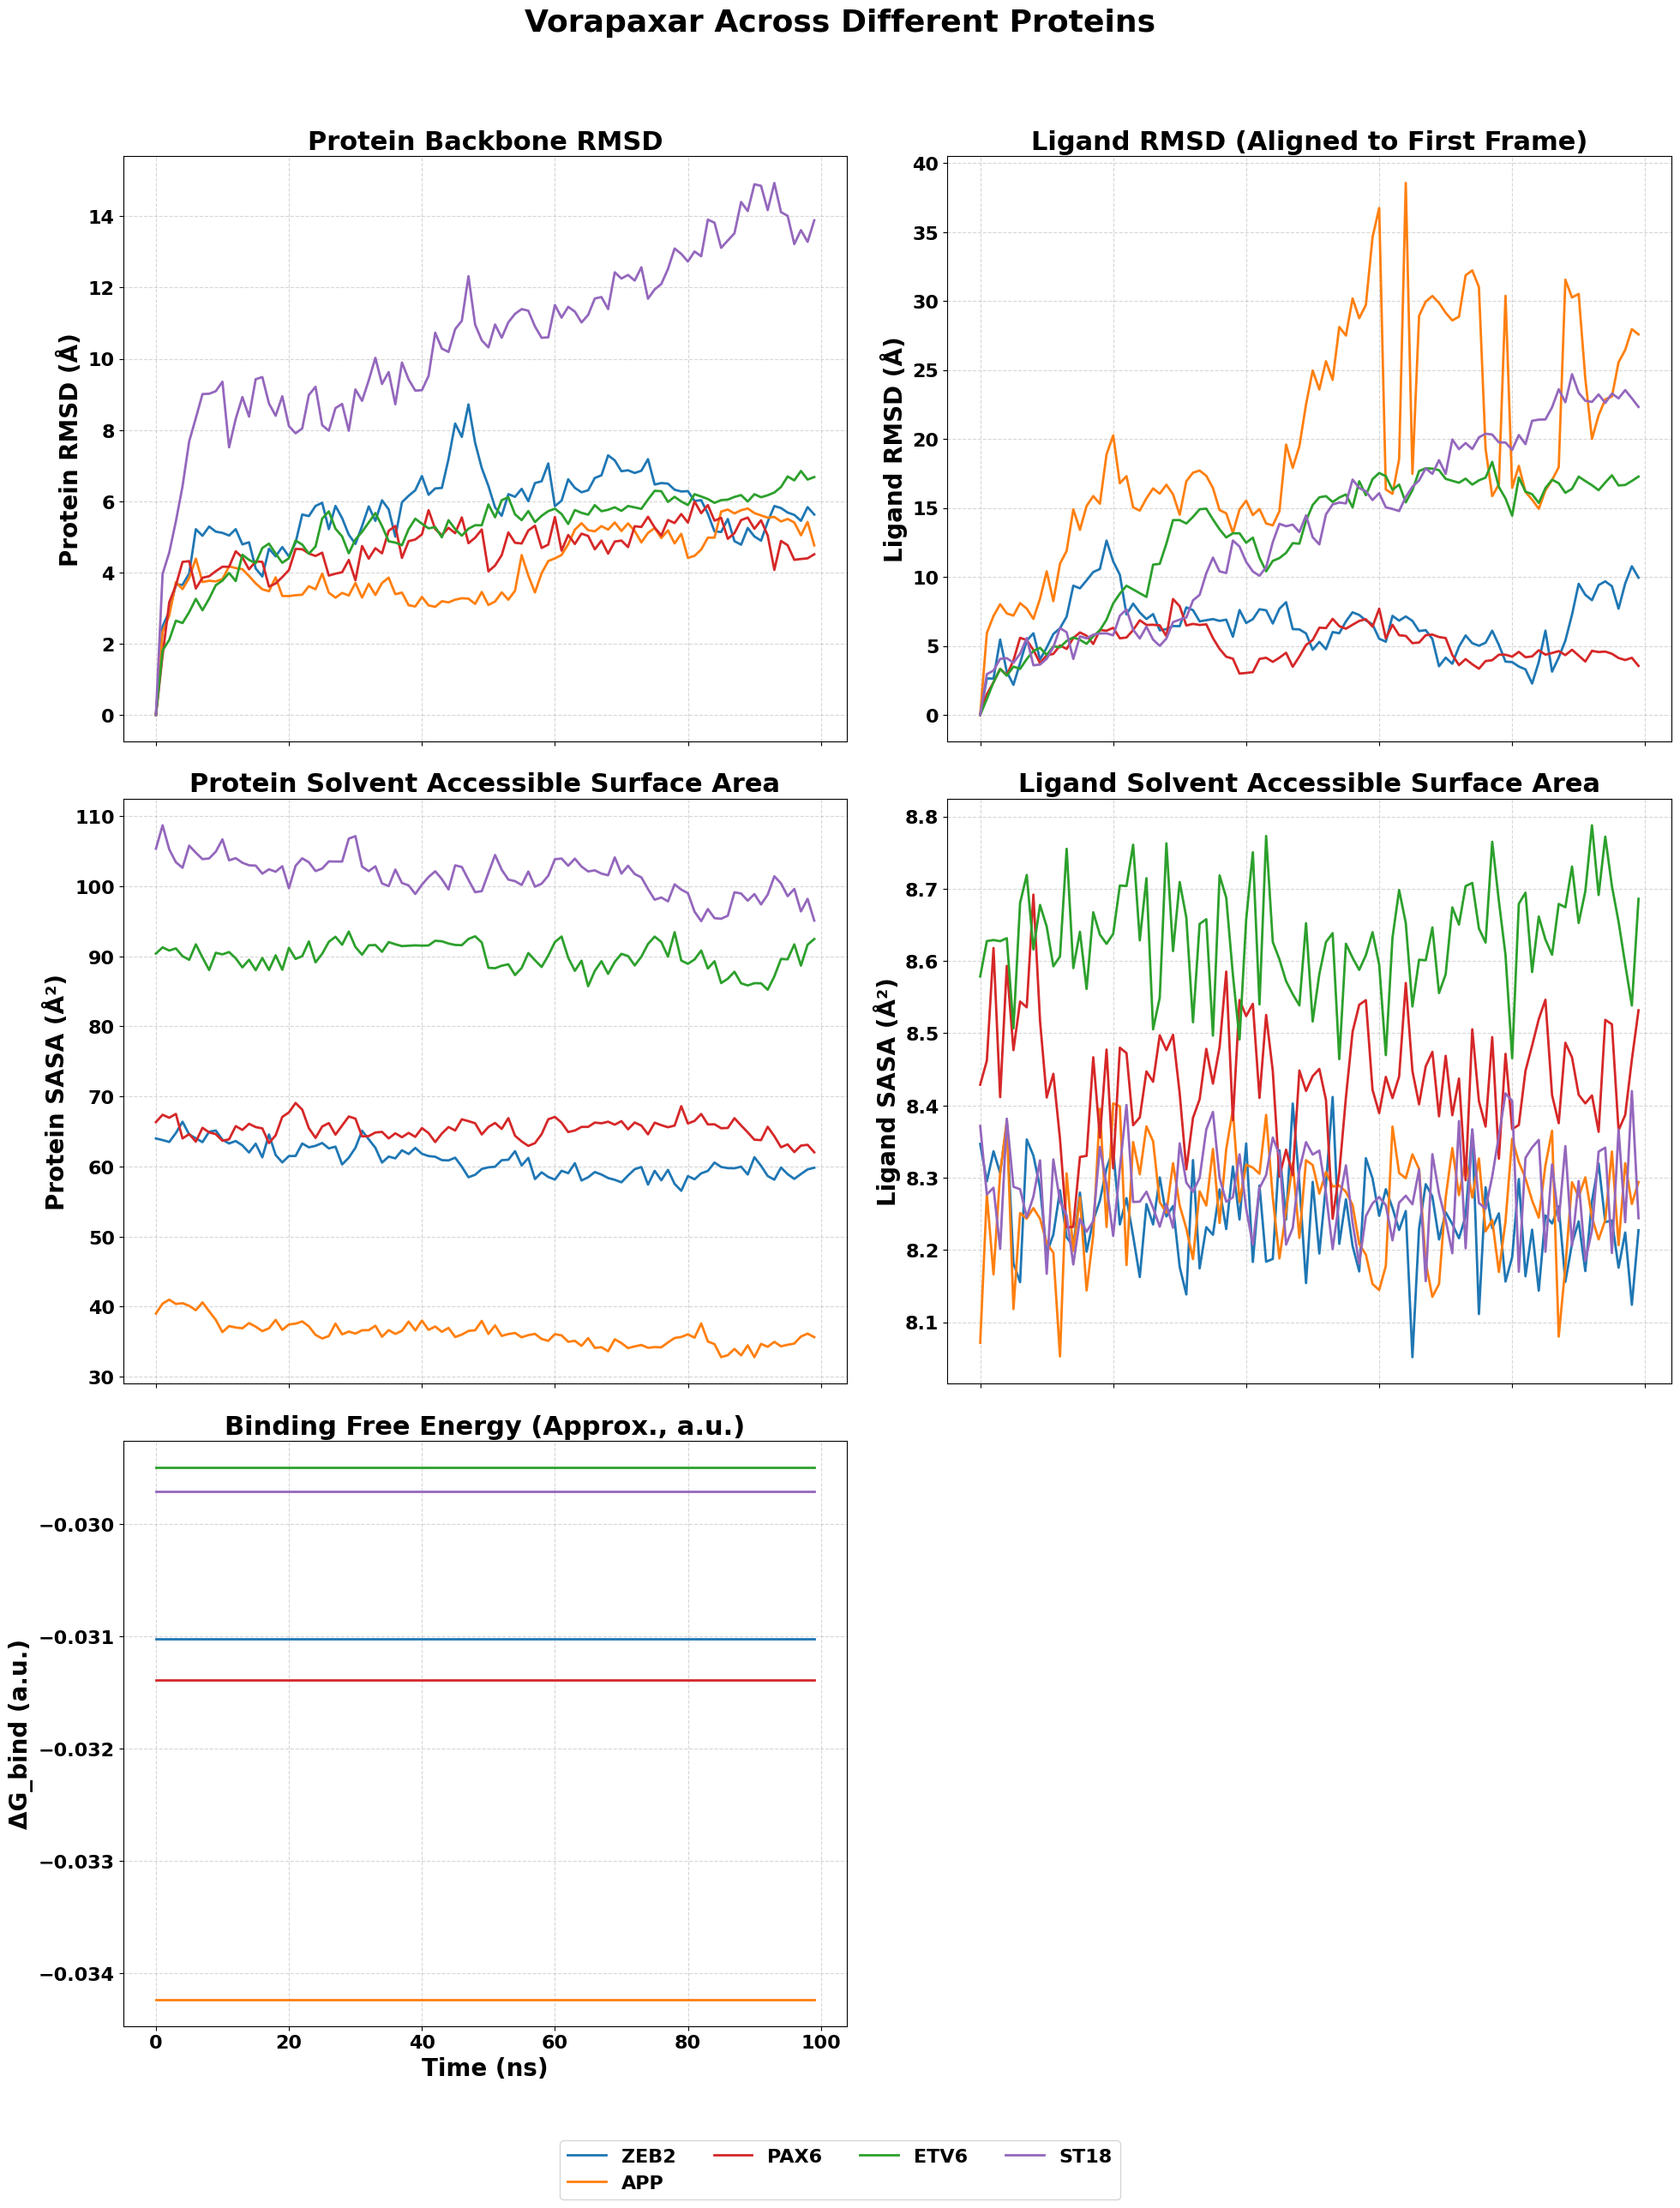

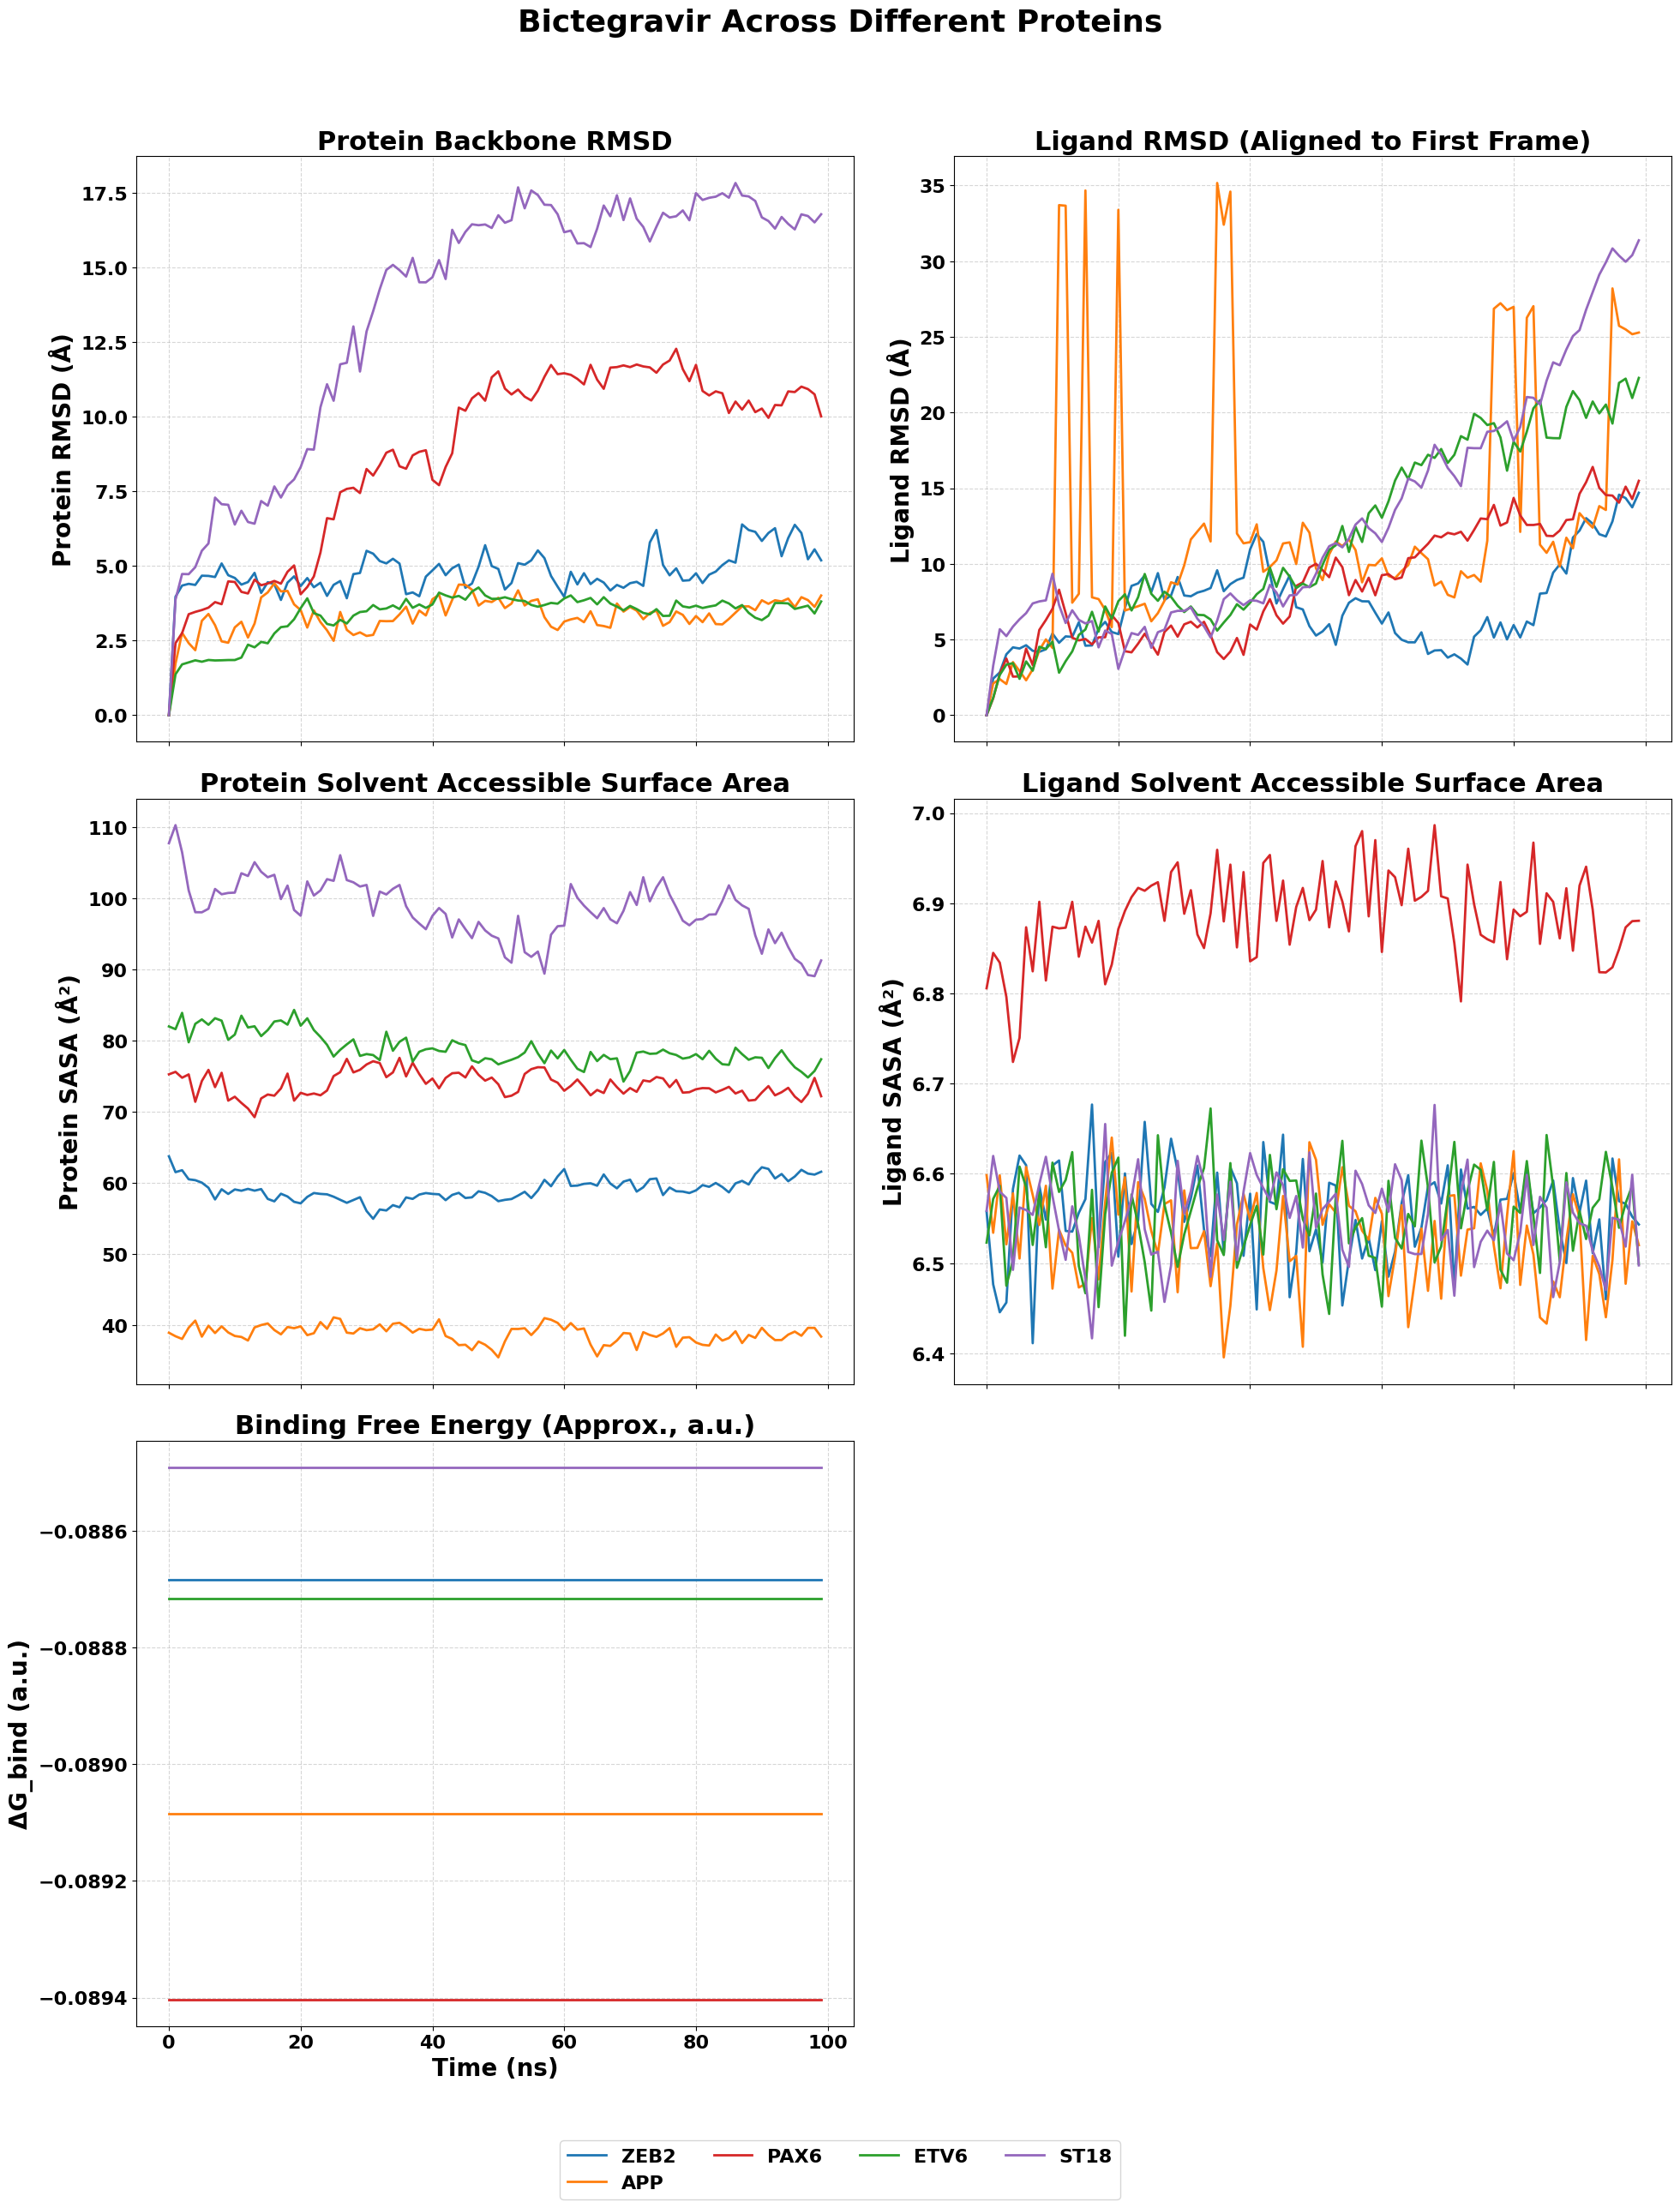

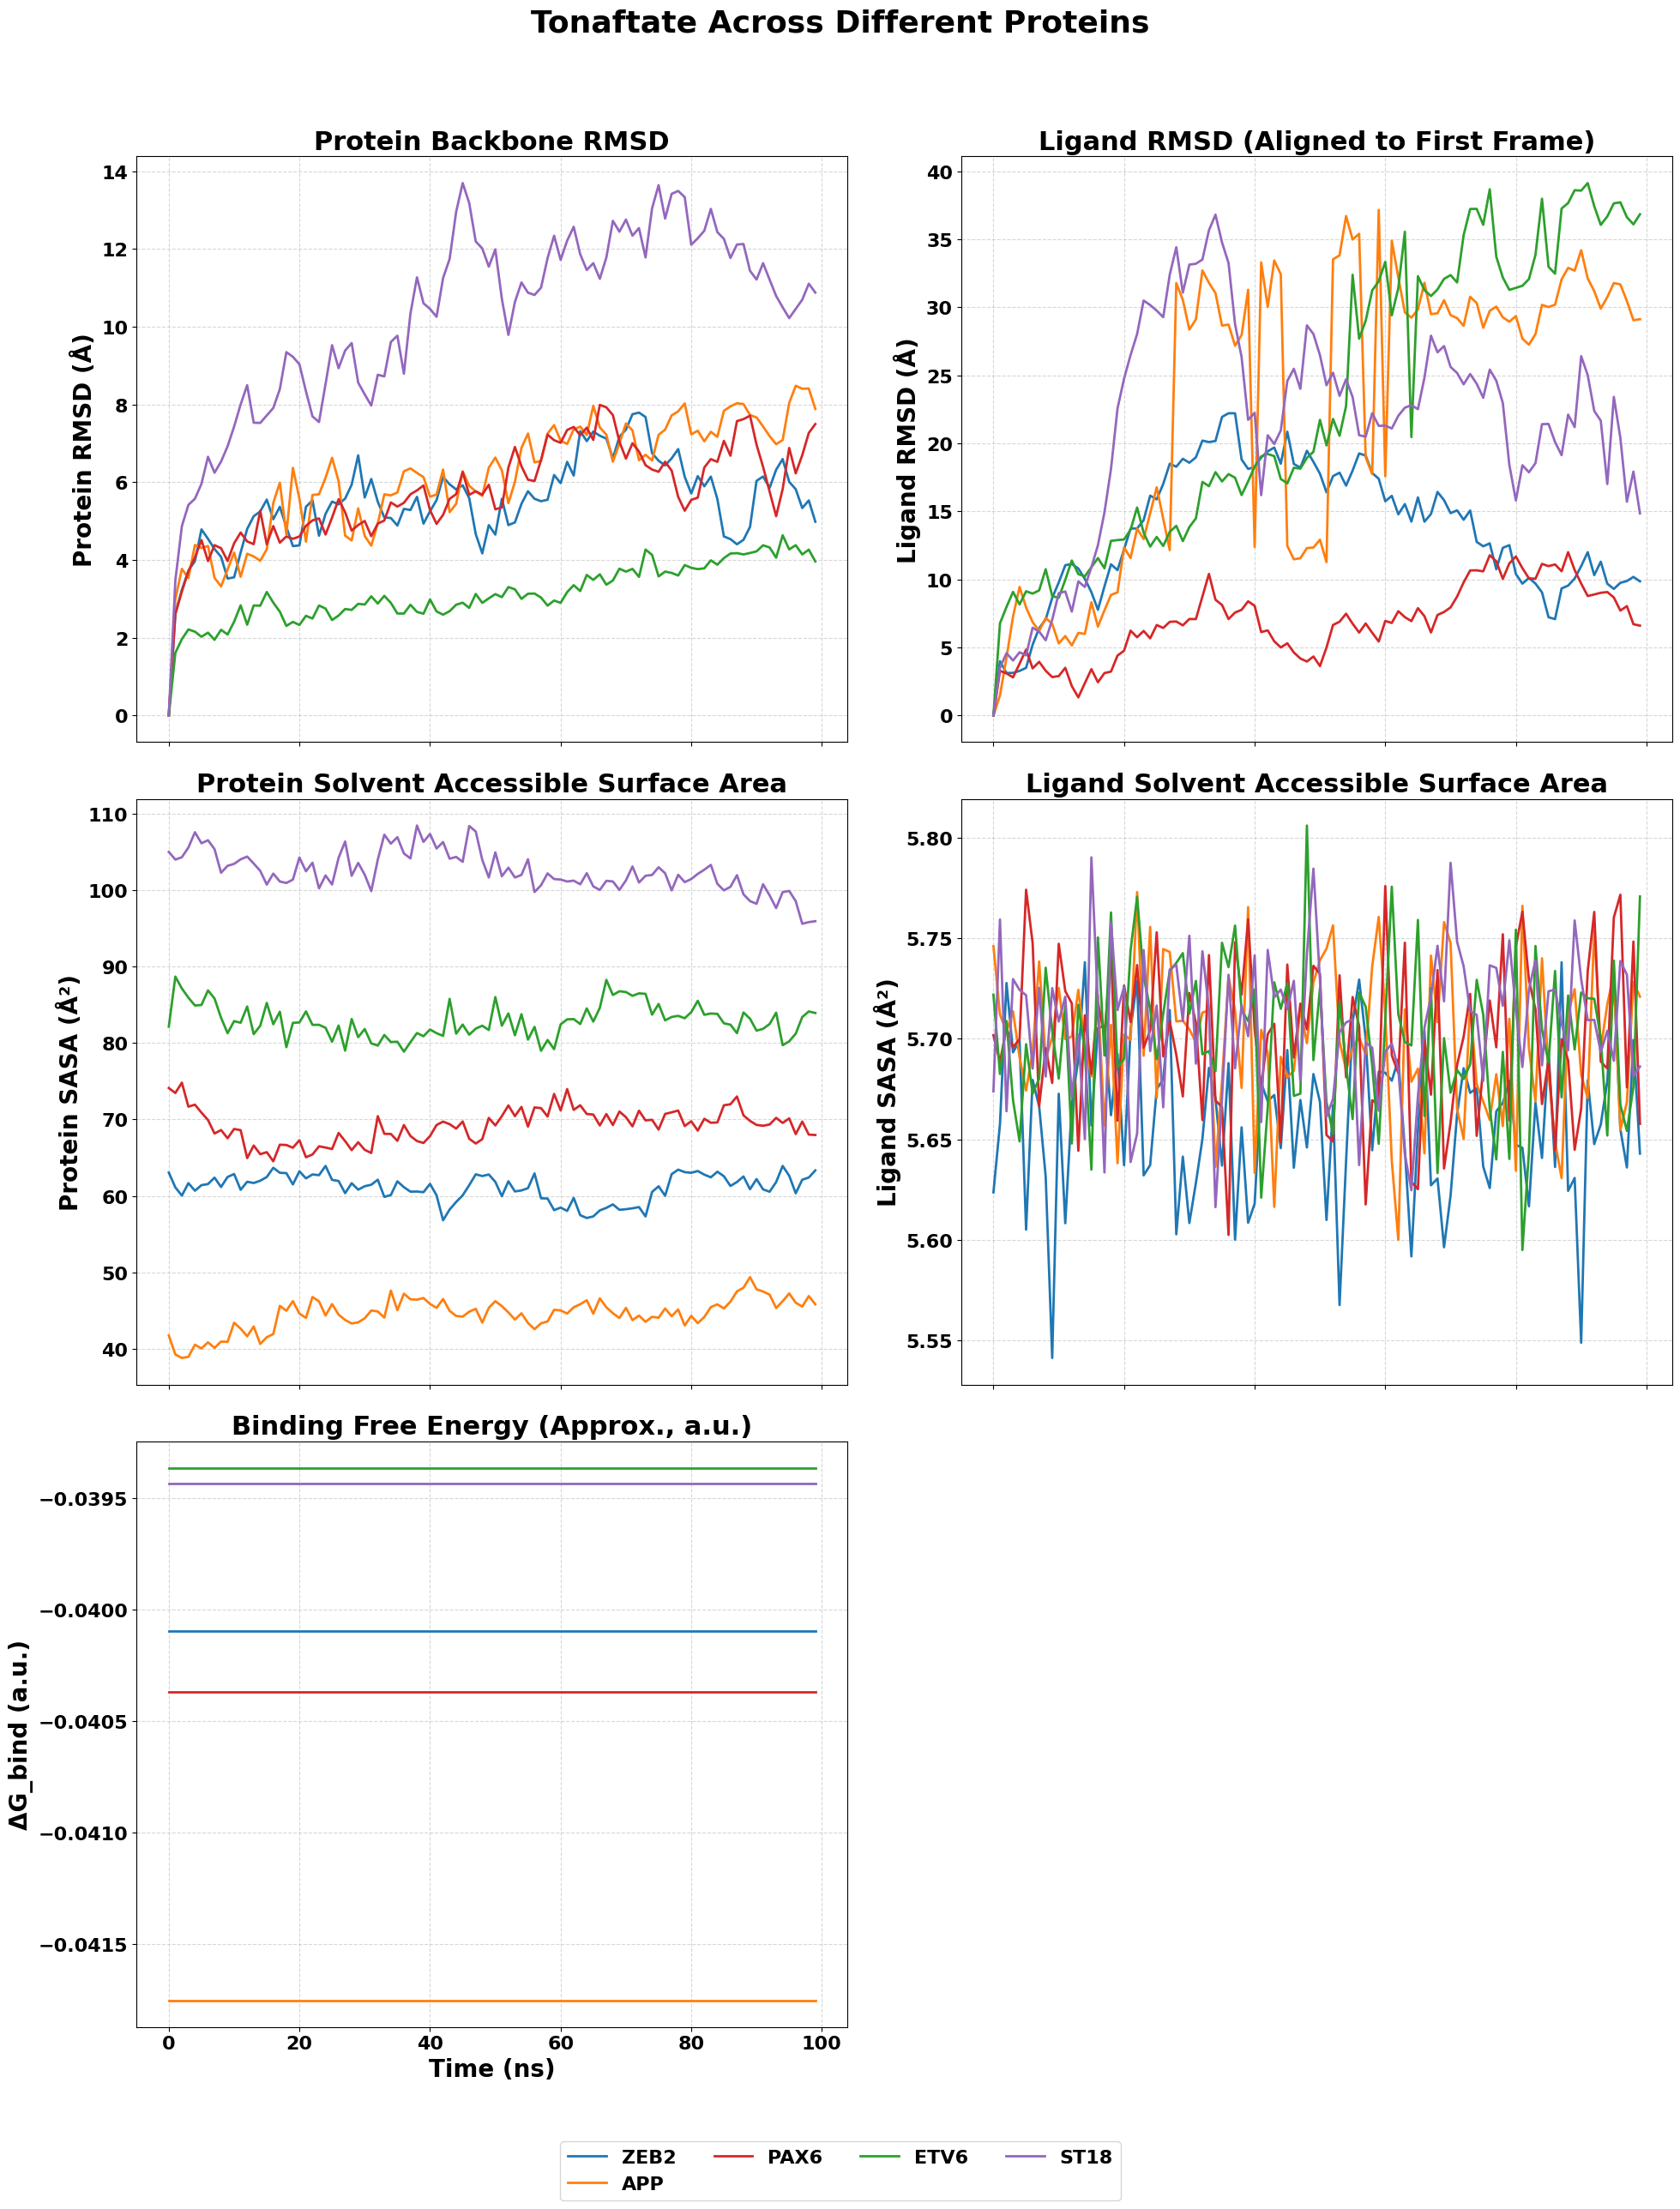

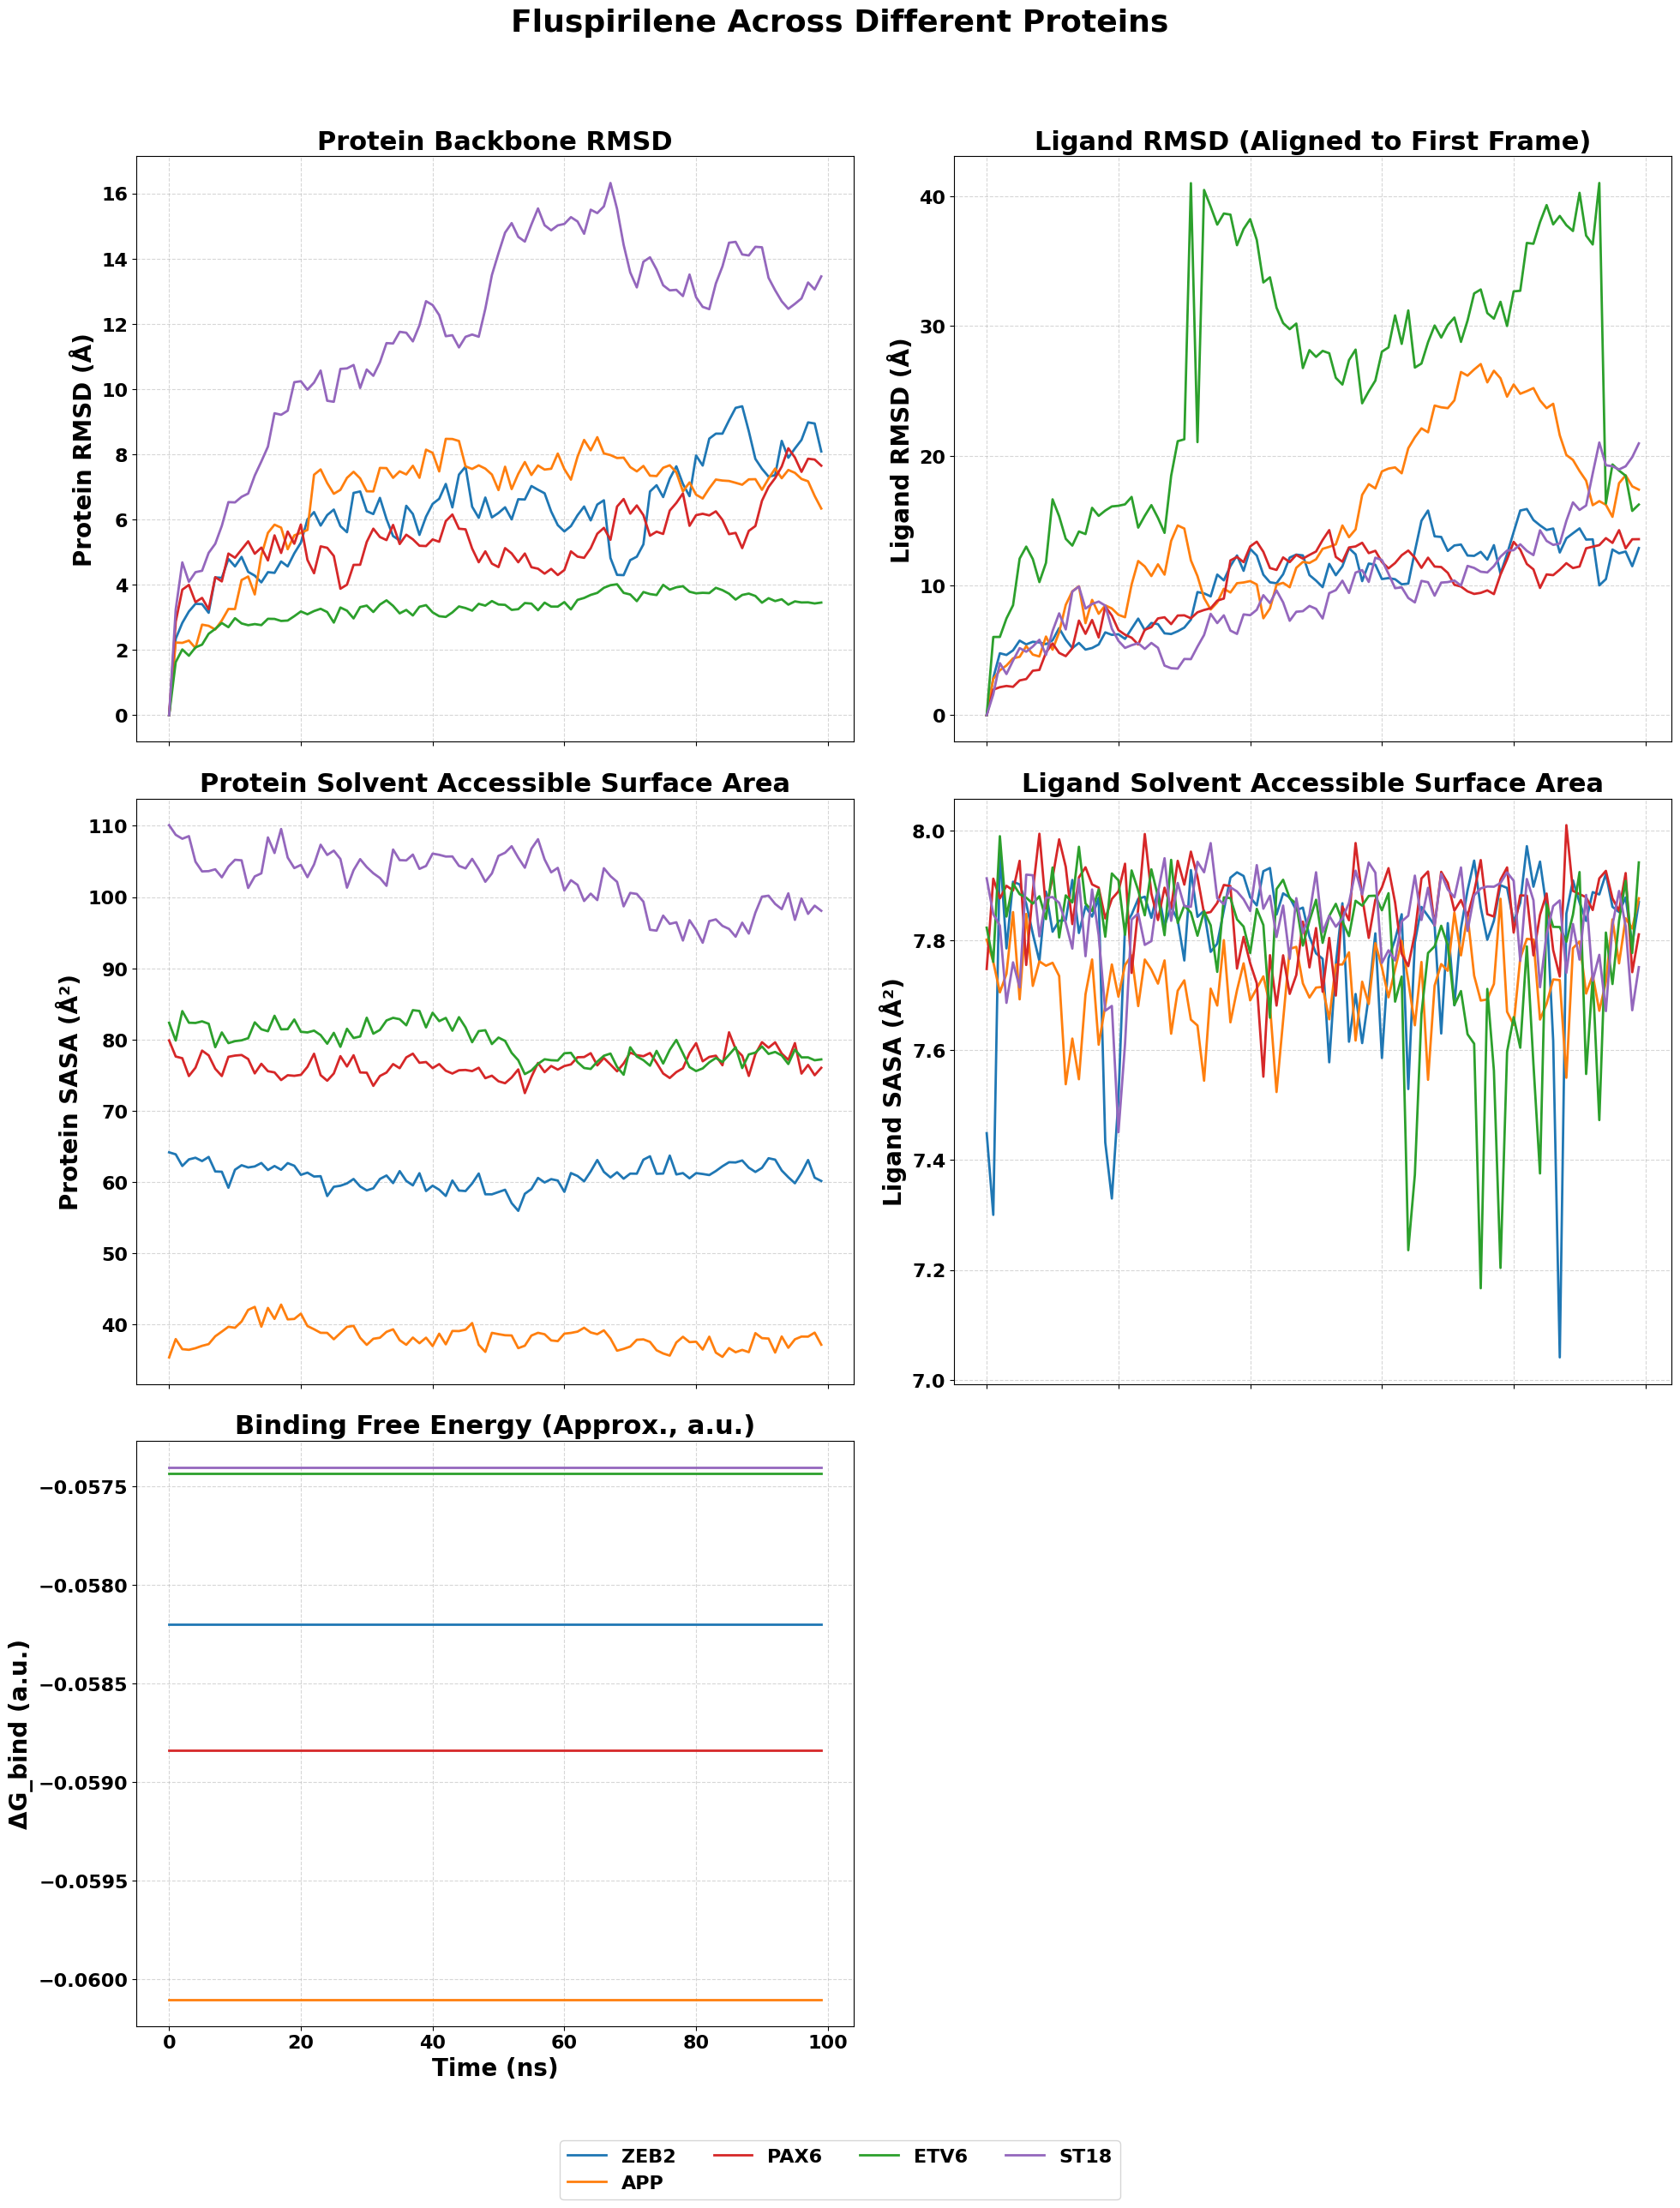

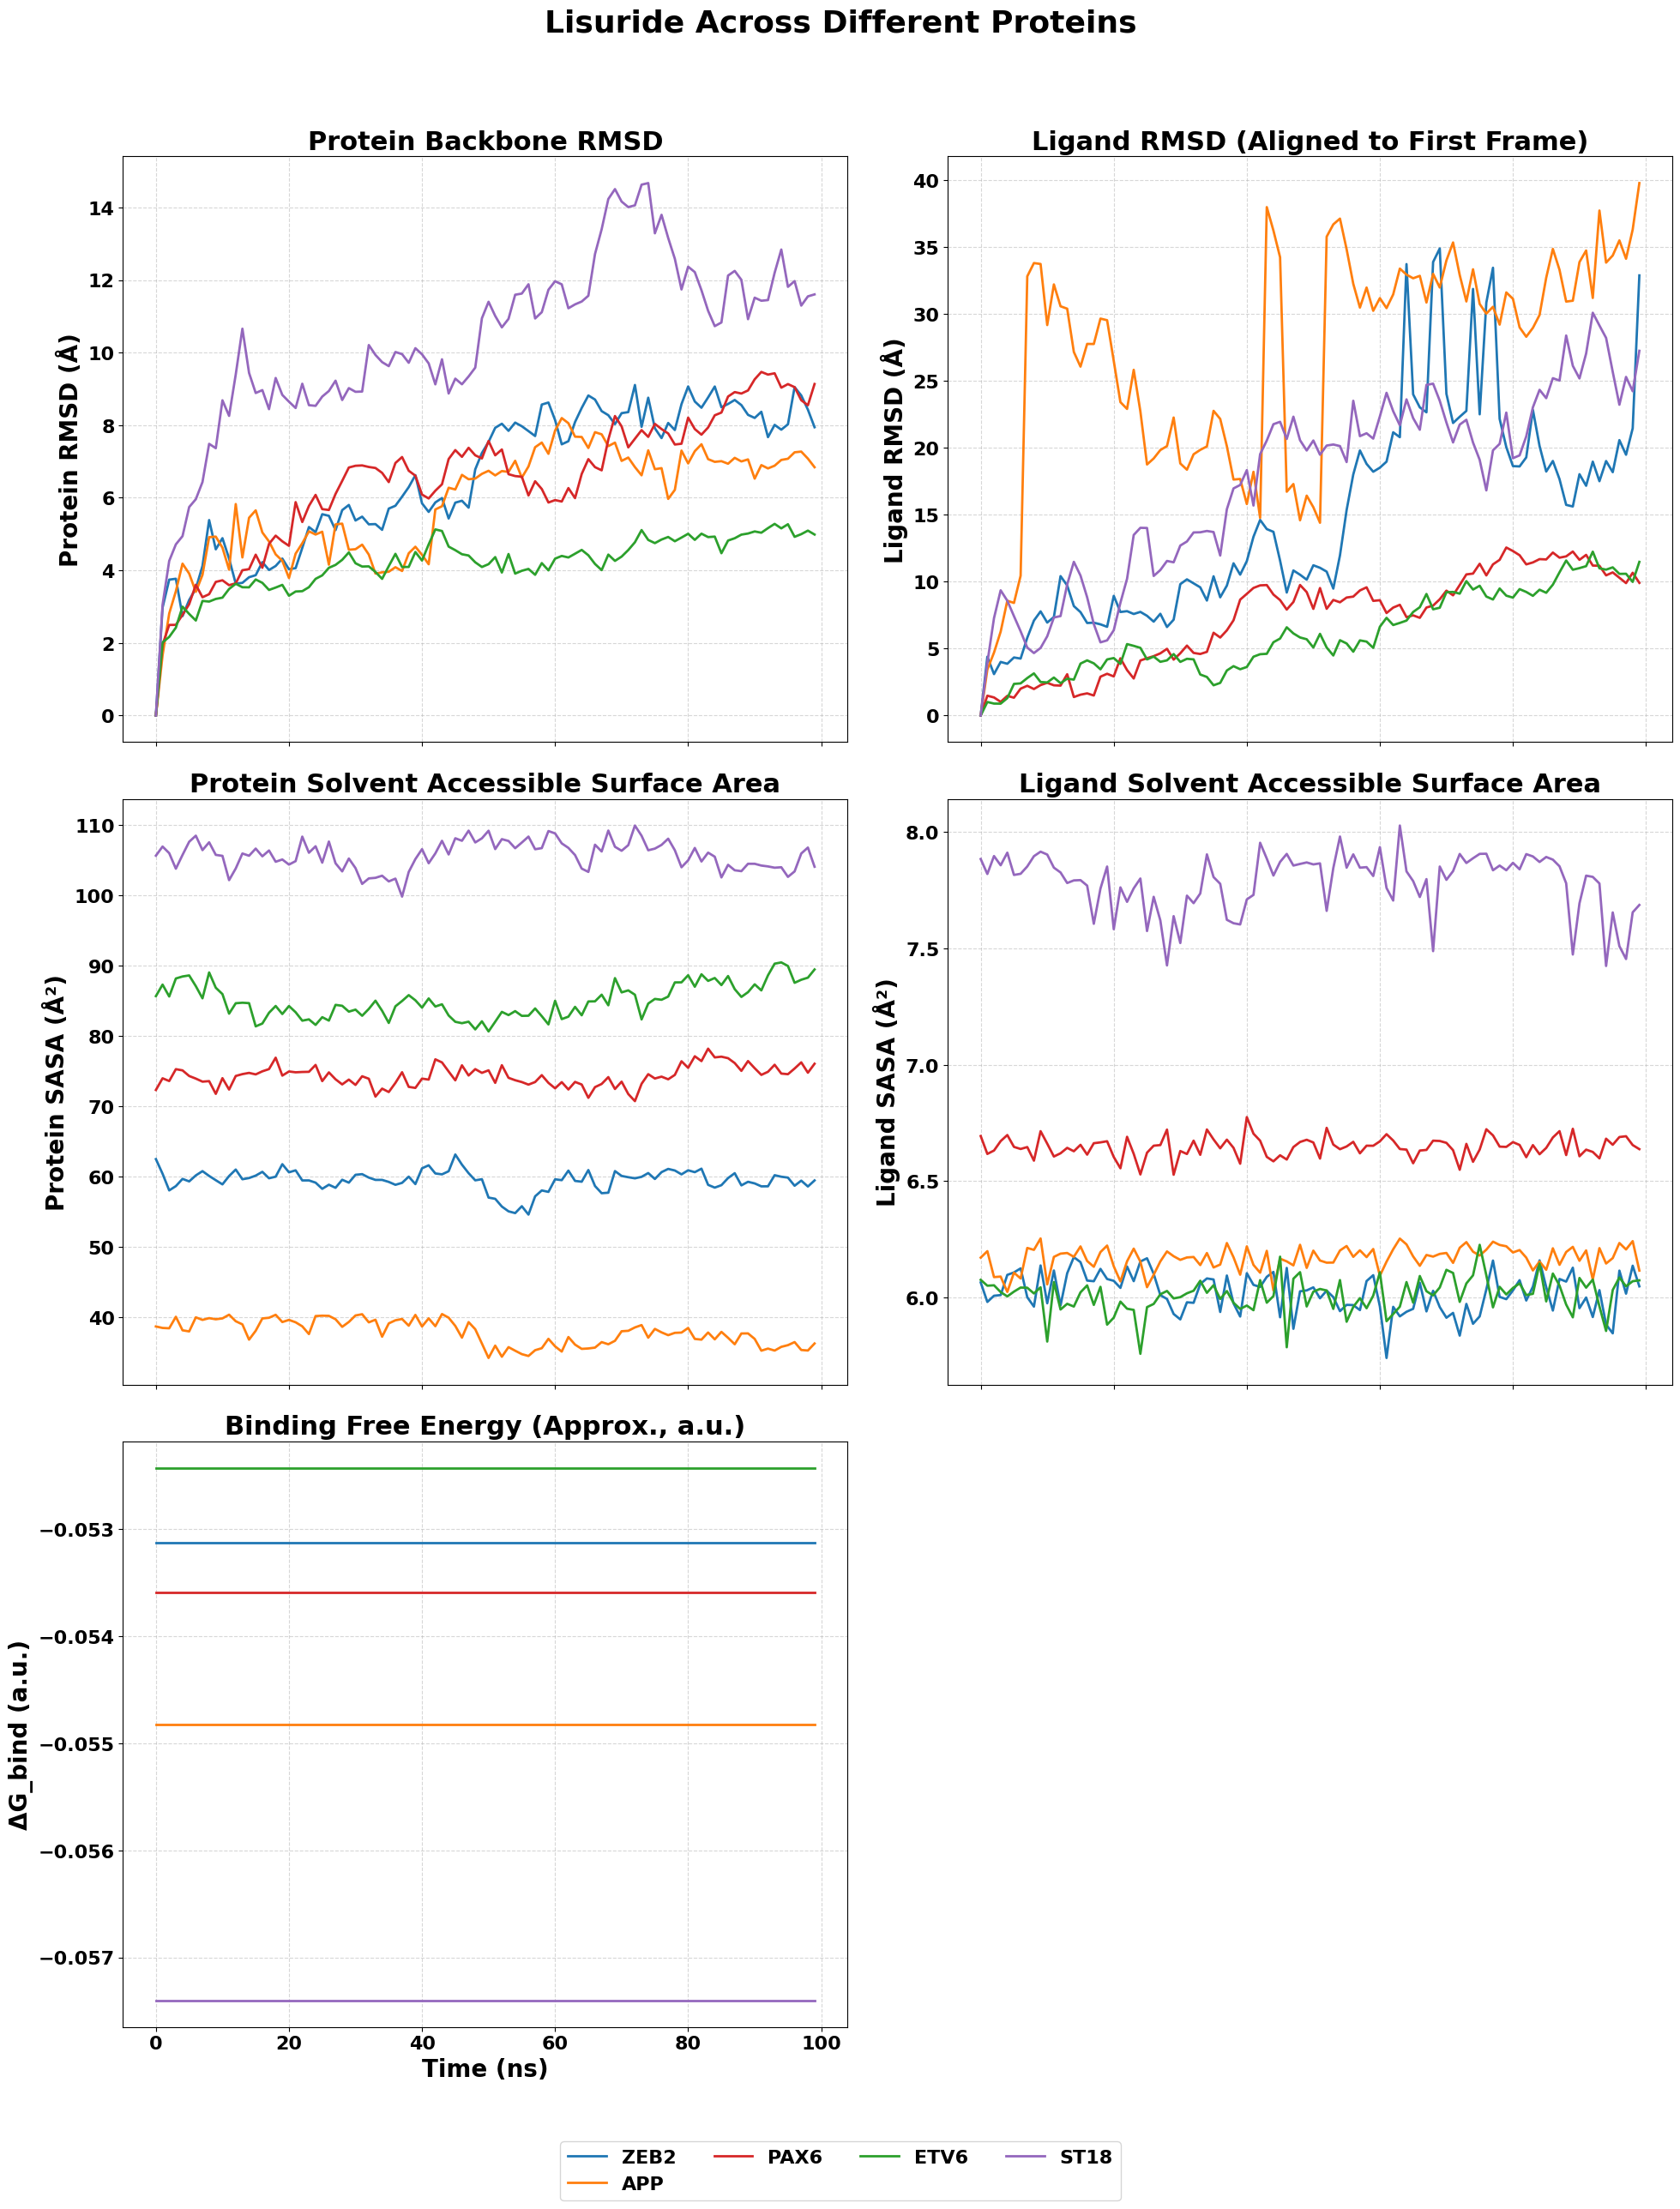

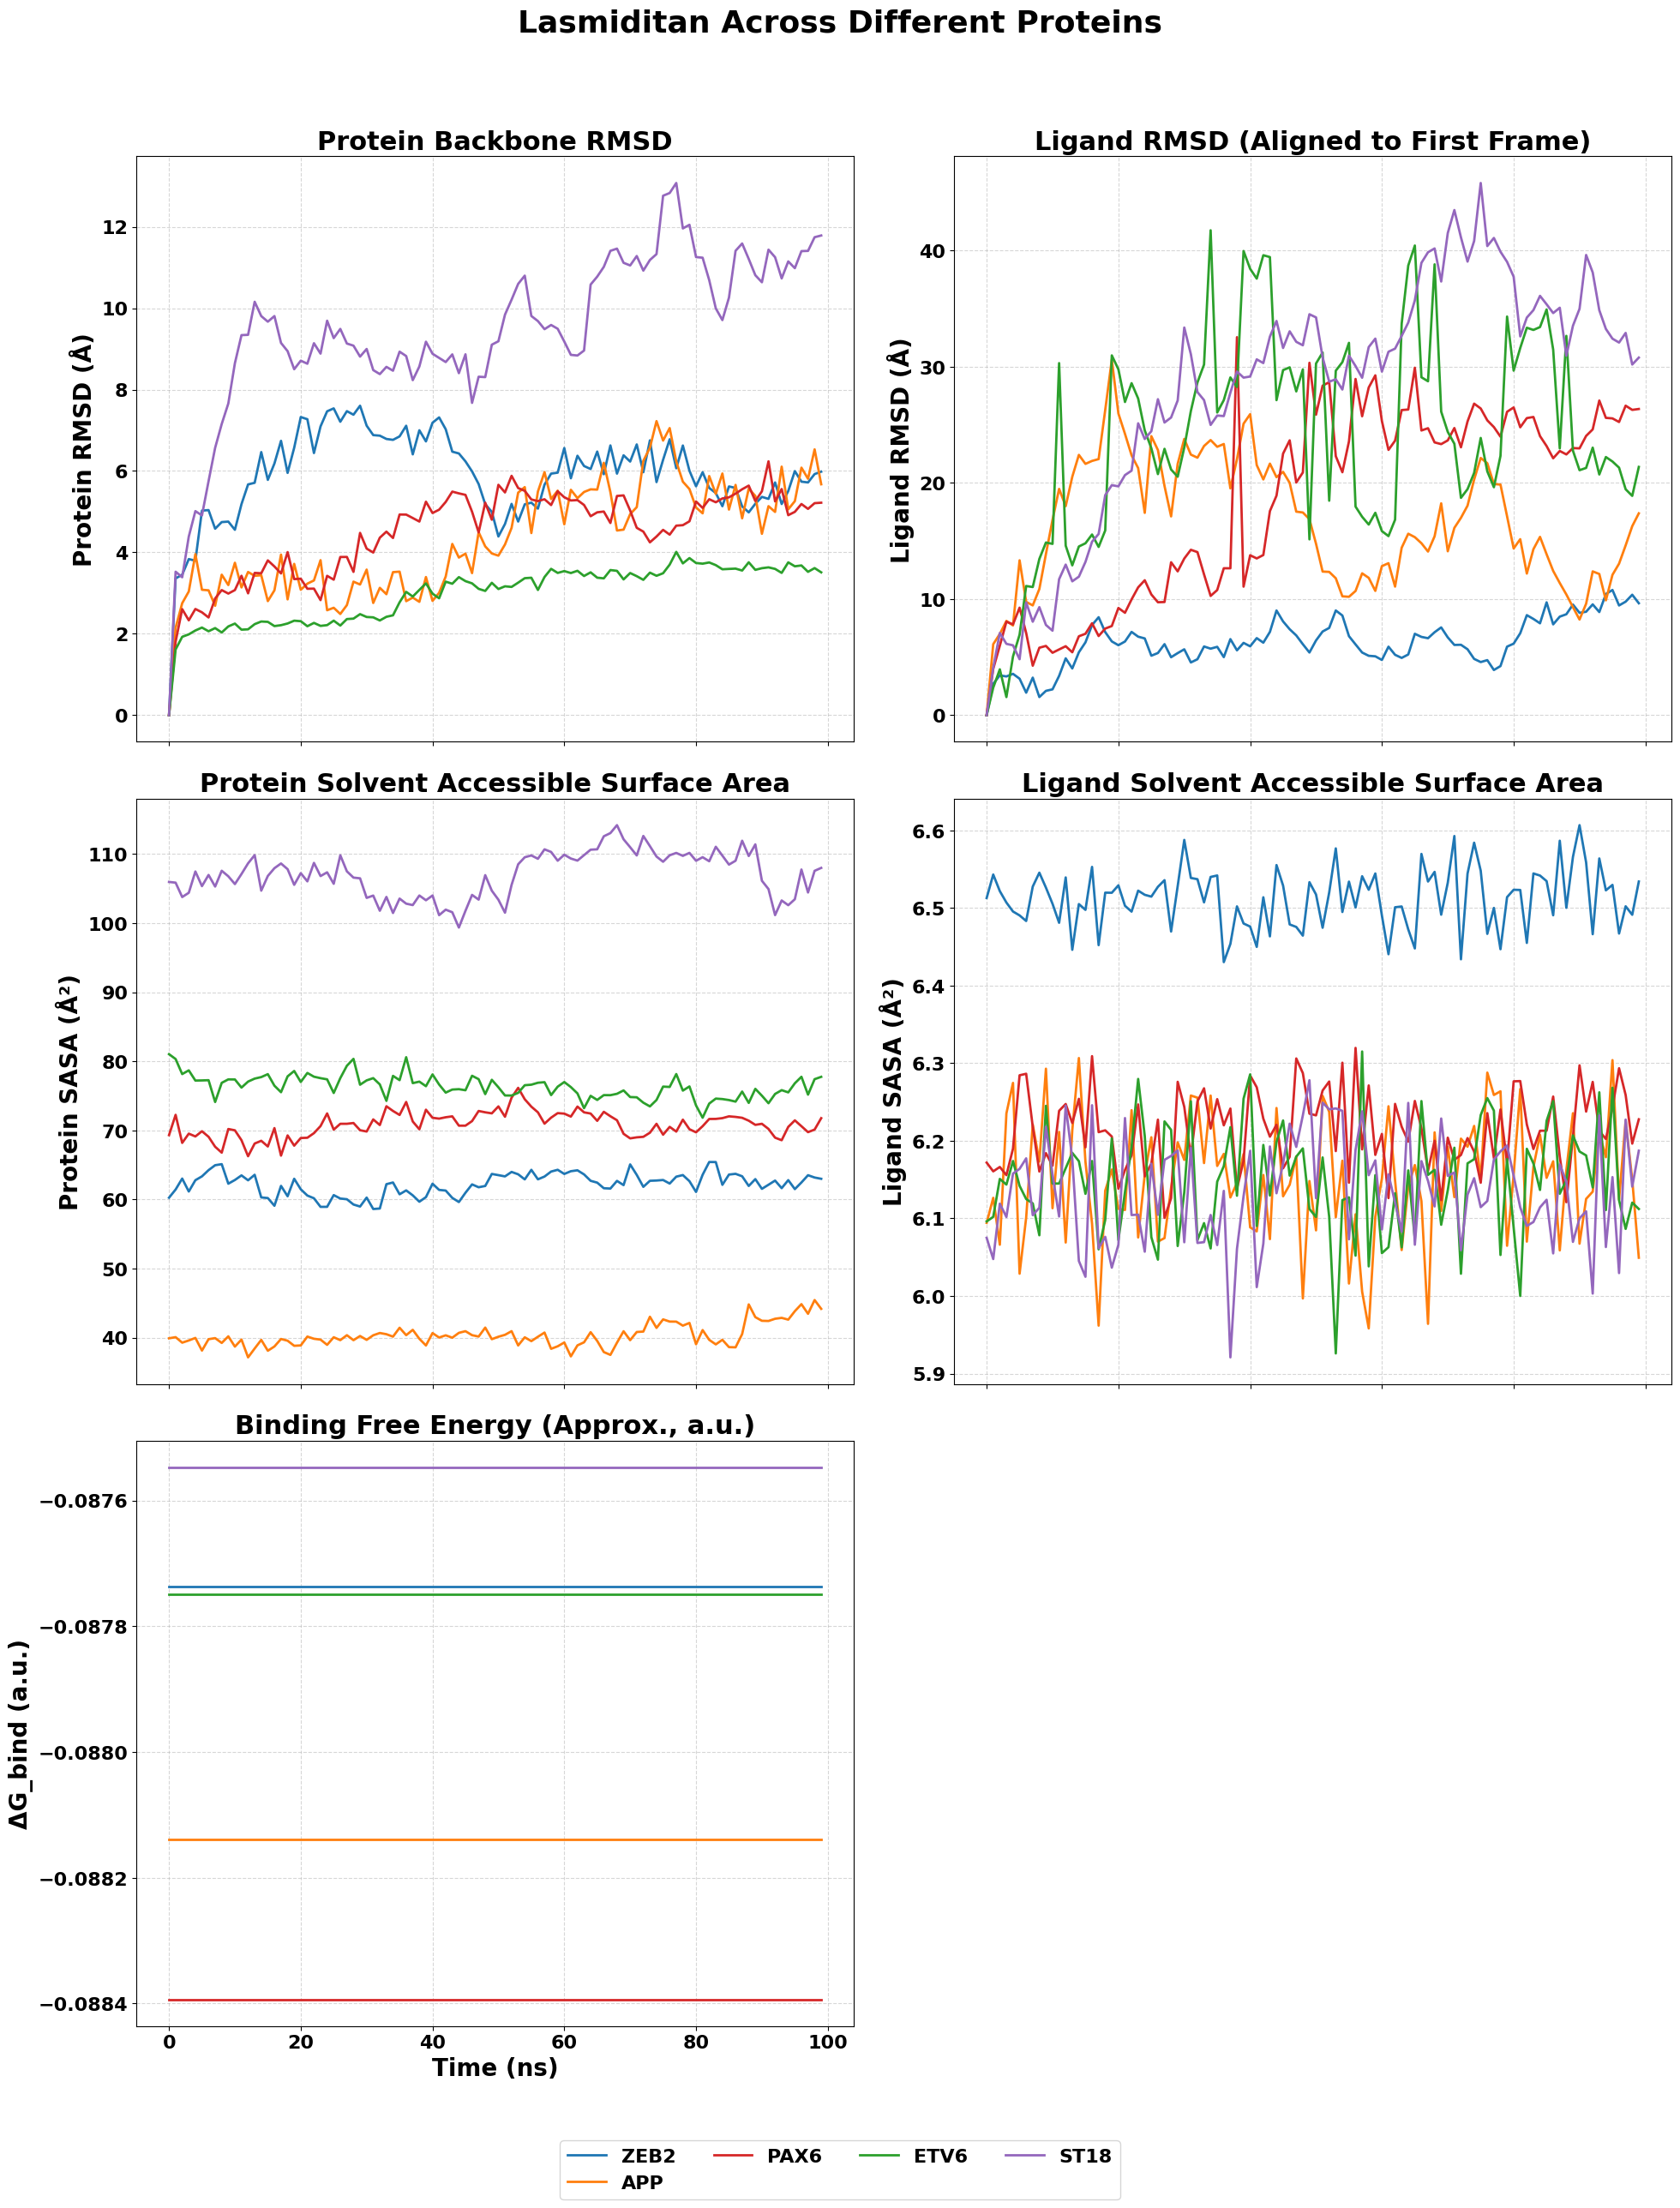

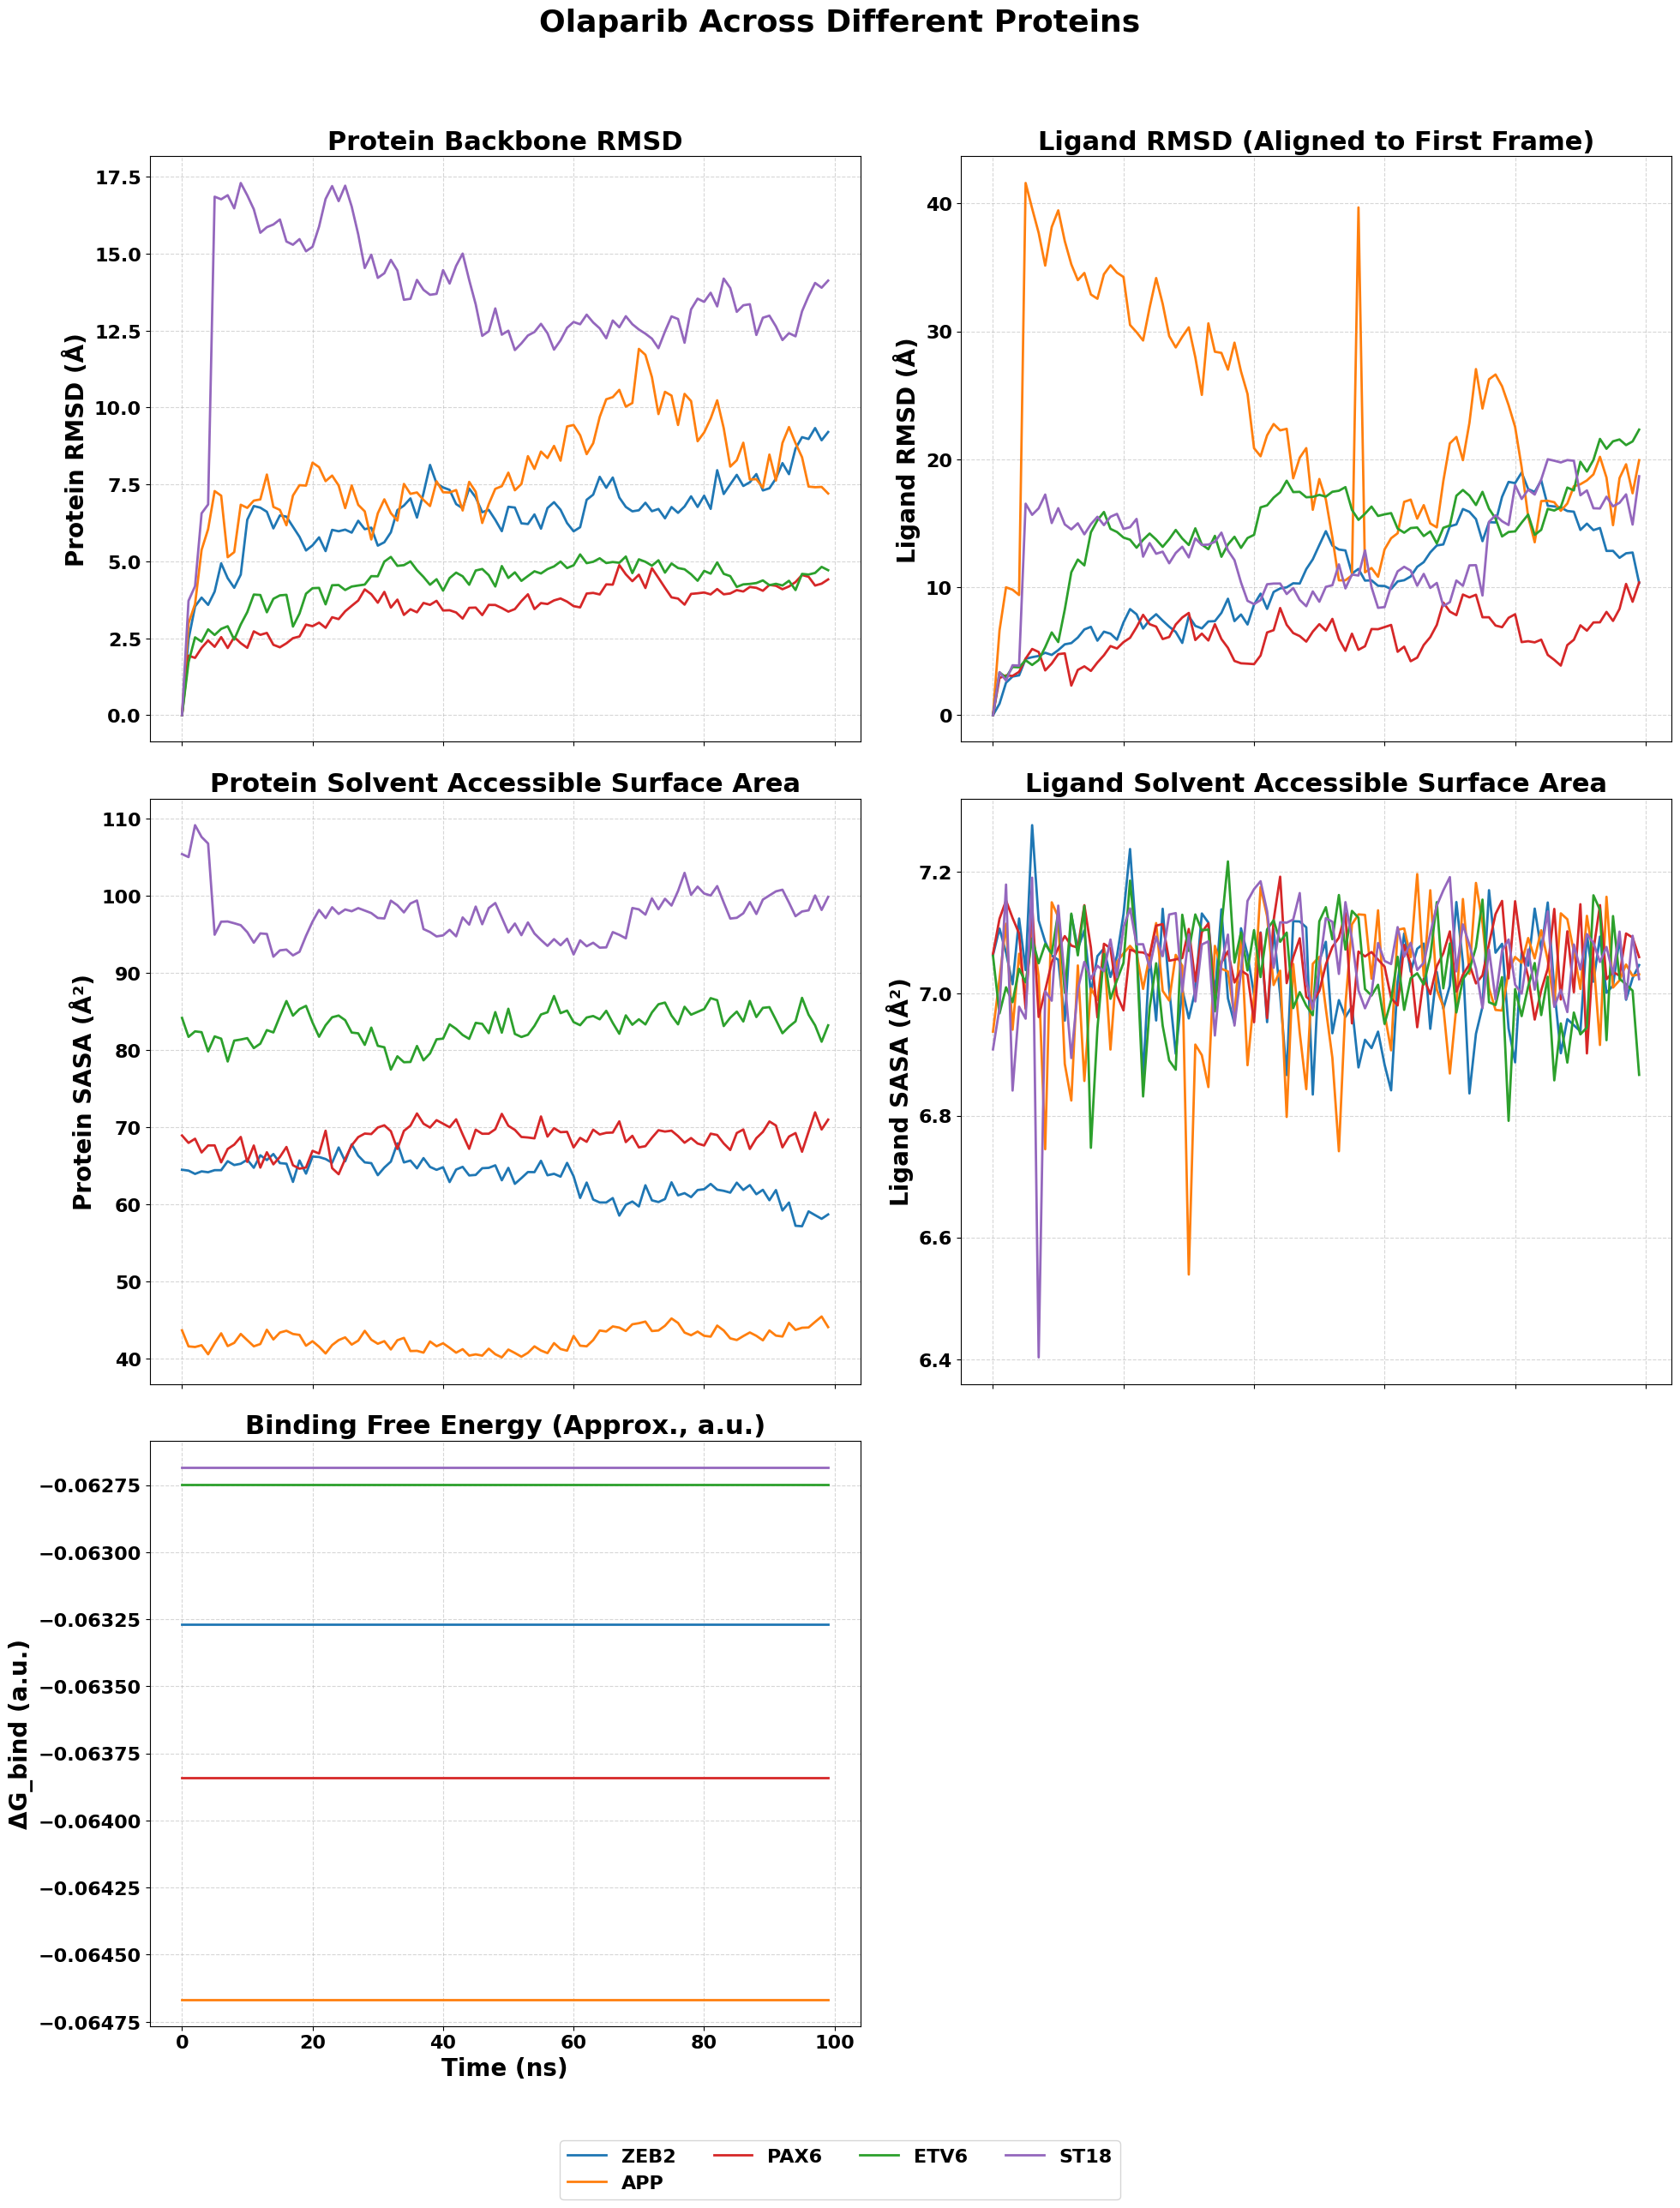


📊 Statistical Summary

💊 Vorapaxar
------------------------------------------------------------------------------------------------------------------------------------------------------
Protein         Prot. RMSD (Å)     Lig. RMSD (Å)      Prot. SASA (Å²)    Lig. SASA (Å²)     ΔG_bind (a.u.)    
------------------------------------------------------------------------------------------------------------------------------------------------------
ZEB2            5.712 ± 1.173    6.432 ± 2.187        60.843 ± 2.151        8.246 ± 0.065        -0.031 ± 0.000
APP             4.152 ± 0.993    19.398 ± 7.776        36.216 ± 1.743        8.265 ± 0.074        -0.034 ± 0.000
PAX6            4.666 ± 0.808    4.970 ± 1.345        65.347 ± 1.367        8.437 ± 0.082        -0.031 ± 0.000
ETV6            5.206 ± 1.145    12.747 ± 4.916        89.974 ± 1.900        8.633 ± 0.072        -0.029 ± 0.000
ST18            10.571 ± 2.507    13.298 ± 6.734        101.389 ± 2.749        8.282 ± 0.061        -

In [25]:
# %matplotlib inline

import mdtraj as md
import MDAnalysis as mda
import matplotlib.pyplot as plt
from MDAnalysis.analysis import rms
import numpy as np
from tqdm.notebook import tqdm
import warnings
import os

# ========================
# CONFIGURATION
# ========================
plt.style.use('default')
plt.rcParams.update({
    'font.size': 20,
    'font.weight': 'bold',
    'axes.labelweight': 'bold',
    'axes.titlesize': 22,
    'axes.titleweight': 'bold',
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 18,
    'figure.titlesize': 24
})
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning,
                        message="DCDReader currently makes independent timesteps")

# ========================
# SYSTEM DEFINITION
# ========================
drug_systems = {
    "Vorapaxar": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_vorapaxar/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_vorapaxar/namd/zeb2_vorapaxar_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_vorapaxar/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_vorapaxar/namd/app_vorapaxar_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_vorapaxar/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_vorapaxar/namd/pax6_vorapaxar_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_vorapaxar/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_vorapaxar/namd/etv6_vorapaxar_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_vorapaxar/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_vorapaxar/namd/st18_vorapaxar_reduced_100ns.dcd")
    },
    "Bictegravir": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_bictegravir/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_bictegravir/namd/zeb2_bictegravir_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_bictegravir_1/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_bictegravir_1/namd/app_bictegravir_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_bictegravir/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_bictegravir/namd/pax6_bictegravir_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_bictegravir/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_bictegravir/namd/etv6_bictegravir_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/st18_bictegravir_reduced_100ns.dcd")
    },
    "Tonaftate": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_tonaftate/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_tonaftate/namd/zeb2_tonaftate_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_tonaftate/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_tonaftate/namd/app_tonaftate_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_tonaftate/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_tonaftate/namd/pax6_tonaftate_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui_etv6_tona/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui_etv6_tona/namd/etv6_tona_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_tonaftate/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_tonaftate/namd/st18_tonaftate_reduced_100ns.dcd")
    },
    "Fluspirilene": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_fluspirilene/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_fluspirilene/namd/zeb2_fluspirilene_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_fluspirilene/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_fluspirilene/namd/app_fluspirilene_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_fluspirilene/namd/step3_input.psf",
                  "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_fluspirilene/namd/pax6_fluspirilene_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_fluspirilene/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_fluspirilene/namd/etv6_fluspirilene_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_fluspirilene/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_fluspirilene/namd/st18_fluspirilene_reduced_100ns.dcd")
    },
    "Lisuride": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_lisuride/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_lisuride/namd/zeb2_lisuride_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_lisuride/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_lisuride/namd/app_lisuride_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_lisuride/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_lisuride/namd/pax6_lisuride_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_lisuride/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_lisuride/namd/etv6_lisuride_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_lisuride/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_lisuride/namd/st18_lisuride_reduced_100ns.dcd")
    },
    "Lasmiditan": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_lasmiditan/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_lasmiditan/namd/zeb2_lasmiditan_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_lasmiditan/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_lasmiditan/namd/app_lasmiditan_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_lasmiditan/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_lasmiditan/namd/pax6_lasmiditan_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_lasmiditan/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_lasmiditan/namd/etv6_lasmiditan_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_lasmiditan/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_lasmiditan/namd/st18_lasmiditan_reduced_100ns.dcd")
    },
    "Olaparib": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_olaparib/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_olaparib/namd/zeb2_olaparib_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_olaparib/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_olaparib/namd/app_olaparib_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_olaparib/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_olaparib/namd/pax6_olaparib_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_olaparib/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_olaparib/namd/etv6_olaparib_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_olaparib/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_olaparib/namd/st18_olaparib_reduced_100ns.dcd")
    }
}

# ========================
# FUNCTIONS
# ========================
def safe_load_trajectory(name, psf, dcd):
    try:
        if not all(os.path.exists(f) for f in [psf, dcd]):
            raise FileNotFoundError(f"Missing files for {name}")
        traj = md.load(dcd, top=psf)
        u = mda.Universe(psf, dcd)
        if len(u.atoms) != traj.n_atoms:
            raise ValueError(f"Atom count mismatch in {name}")
        if len(u.select_atoms("resname LIG")) == 0:
            raise ValueError(f"No ligand found in {name} (resname LIG)")
        return traj, u
    except Exception as e:
        print(f"⛔ Error loading {name}: {str(e)}")
        return None, None

def calculate_protein_rmsd(u):
    protein = u.select_atoms("protein")
    R = rms.RMSD(protein, protein).run()
    times = np.array([ts.time for ts in u.trajectory]) / 1000.0
    return times, R.results.rmsd[:, 2]

def calculate_ligand_rmsd(u):
    ligand = u.select_atoms("resname LIG")
    initial_pos = ligand.positions.copy()
    rmsd_values = []
    times = []

    for ts in u.trajectory:
        rmsd = np.sqrt(np.mean((ligand.positions - initial_pos) ** 2))
        rmsd_values.append(rmsd)
        times.append(ts.time / 1000.0)
    
    return np.array(times), np.array(rmsd_values)

def calculate_protein_sasa(traj):
    indices = traj.topology.select("protein")
    sasa = md.shrake_rupley(traj.atom_slice(indices))
    return traj.time / 1000.0, np.sum(sasa, axis=1)

def calculate_ligand_sasa(traj, u):
    indices = traj.topology.select("resname LIG")
    sasa = md.shrake_rupley(traj.atom_slice(indices))
    return traj.time / 1000.0, np.sum(sasa, axis=1)

def estimate_binding_energy(u):
    protein = u.select_atoms("protein")
    ligand = u.select_atoms("resname LIG")
    complex_atoms = u.select_atoms("protein or resname LIG")
    times = []
    dG_vals = []

    for ts in u.trajectory[::10]:
        e_complex = np.sum(complex_atoms.charges**2) / complex_atoms.n_atoms
        e_protein = np.sum(protein.charges**2) / protein.n_atoms
        e_ligand = np.sum(ligand.charges**2) / ligand.n_atoms
        dG_vals.append(e_complex - (e_protein + e_ligand))
        times.append(ts.time / 1000.0)
    
    return np.array(times), np.array(dG_vals)

# ========================
# MAIN ANALYSIS
# ========================
drug_metrics = {}
print("🔬 Starting analysis of drug-protein complexes...\n")

for drug_name, systems in tqdm(drug_systems.items(), desc="Drugs"):
    drug_metrics[drug_name] = {}

    for protein_name, (psf, dcd) in systems.items():
        traj, u = safe_load_trajectory(f"{drug_name}-{protein_name}", psf, dcd)
        if traj is None or u is None:
            continue

        t_rmsd_p, y_rmsd_p = calculate_protein_rmsd(u)
        t_rmsd_l, y_rmsd_l = calculate_ligand_rmsd(u)
        t_sasa_p, y_sasa_p = calculate_protein_sasa(traj)
        t_sasa_l, y_sasa_l = calculate_ligand_sasa(traj, u)
        t_dG, y_dG = estimate_binding_energy(u)

        min_len = min(len(t_rmsd_p), len(y_rmsd_p), len(y_rmsd_l), len(y_sasa_p), len(y_sasa_l), len(y_dG))

        drug_metrics[drug_name][protein_name] = {
            'time': t_rmsd_p[:min_len],
            'protein_rmsd': y_rmsd_p[:min_len],
            'ligand_rmsd': y_rmsd_l[:min_len],
            'protein_sasa': y_sasa_p[:min_len],
            'ligand_sasa': y_sasa_l[:min_len],
            'dG': y_dG[:min_len],
        }

print("✅ Analysis complete.")

import matplotlib.pyplot as plt
import numpy as np

# Convert time to ns just once
for drug_name, proteins_data in drug_metrics.items():
    for protein_name, metrics in proteins_data.items():
        metrics['time_ns'] = metrics['time'] * 1000  # Convert to ns




import matplotlib.pyplot as plt
import numpy as np

# ========================
# PLOTTING (One figure per drug)
# ========================
# Color scheme for proteins
protein_colors = {
    "ZEB2": "#1f77b4",
    "APP": "#ff7f0e",
    "ETV6": "#2ca02c",
    "PAX6": "#d62728"
}

for drug_name, protein_data in drug_metrics.items():
    if not protein_data:  # Skip if no data
        continue
        
    fig, axs = plt.subplots(3, 2, figsize=(20, 24), sharex=True)
    fig.suptitle(f"{drug_name} Across Different Proteins", y=1.02, fontsize=26, fontweight='bold')
    axs = axs.flatten()

    for protein_name, data in protein_data.items():
        color = protein_colors.get(protein_name, "#9467bd")
        time_ns = data['time_ns']

        if time_ns is not None:
            if data['protein_rmsd'] is not None:
                axs[0].plot(time_ns, data['protein_rmsd'], label=f"{protein_name}", color=color, linewidth=2)
            if data['ligand_rmsd'] is not None:
                axs[1].plot(time_ns, data['ligand_rmsd'], label=f"{protein_name}", color=color, linewidth=2)
            if data['protein_sasa'] is not None:
                axs[2].plot(time_ns, data['protein_sasa'], label=f"{protein_name}", color=color, linewidth=2)
            if data['ligand_sasa'] is not None:
                axs[3].plot(time_ns, data['ligand_sasa'], label=f"{protein_name}", color=color, linewidth=2)
            if data['dG'] is not None:
                axs[4].plot(time_ns, data['dG'], label=protein_name, color=color, linewidth=2)

    axs[0].set_ylabel('Protein RMSD (Å)')
    axs[0].set_title('Protein Backbone RMSD')
    axs[1].set_ylabel('Ligand RMSD (Å)')
    axs[1].set_title('Ligand RMSD (Aligned to First Frame)')
    axs[2].set_ylabel('Protein SASA (Å²)')
    axs[2].set_title('Protein Solvent Accessible Surface Area')
    axs[3].set_ylabel('Ligand SASA (Å²)')
    axs[3].set_title('Ligand Solvent Accessible Surface Area')
    axs[4].set_xlabel('Time (ns)')
    axs[4].set_ylabel('ΔG_bind (a.u.)')
    axs[4].set_title('Binding Free Energy (Approx., a.u.)')
    axs[5].axis('off')  # To keep the grid consistent if fewer systems

    for ax in axs[:5]:
        ax.grid(True, linestyle='--', alpha=0.5)
        ax.tick_params(axis='both', which='major', labelsize=16)
    
    # Create a single legend for all plots
    handles, labels = axs[0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='lower center', ncol=min(4, len(labels)), 
               bbox_to_anchor=(0.5, -0.05), fontsize=16)
    
    plt.tight_layout()
    plt.savefig(f"{drug_name}_across_proteins.png", dpi=300, bbox_inches='tight')
    plt.show()

# ========================
# SUMMARY (Organized by drug)
# ========================
print("\n📊 Statistical Summary")
print("="*150)
for drug_name, protein_data in drug_metrics.items():
    print(f"\n💊 {drug_name}")
    print("-"*150)
    print("{:<15} {:<18} {:<18} {:<18} {:<18} {:<18}".format(
        "Protein", "Prot. RMSD (Å)", "Lig. RMSD (Å)", 
        "Prot. SASA (Å²)", "Lig. SASA (Å²)", "ΔG_bind (a.u.)"))
    print("-"*150)
    
    for protein_name, data in protein_data.items():
        print("{:<15} {:.3f} ± {:.3f}    {:.3f} ± {:.3f}        {:.3f} ± {:.3f}        {:.3f} ± {:.3f}        {:.3f} ± {:.3f}".format(
            protein_name, 
            np.mean(data['protein_rmsd']), np.std(data['protein_rmsd']),
            np.mean(data['ligand_rmsd']), np.std(data['ligand_rmsd']),
            np.mean(data['protein_sasa']), np.std(data['protein_sasa']),
            np.mean(data['ligand_sasa']), np.std(data['ligand_sasa']),
            np.mean(data['dG']), np.std(data['dG'])
        ))


Loading trajectory: /Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_vorapaxar/namd/step3_input.psf and /Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_vorapaxar/namd/zeb2_vorapaxar_reduced_100ns.dcd
Calculating hydrogen bonds...
[Vorapaxar - ZEB2] Avg. H-bonds per frame: 35.22
Loading trajectory: /Users/martinnwadiugwu/Downloads/charmm-gui-app_vorapaxar/namd/step3_input.psf and /Users/martinnwadiugwu/Downloads/charmm-gui-app_vorapaxar/namd/app_vorapaxar_reduced_100ns.dcd
Calculating hydrogen bonds...
[Vorapaxar - APP] Avg. H-bonds per frame: 15.20
Loading trajectory: /Users/martinnwadiugwu/Downloads/charmm-gui-pax6_vorapaxar/namd/step3_input.psf and /Users/martinnwadiugwu/Downloads/charmm-gui-pax6_vorapaxar/namd/pax6_vorapaxar_reduced_100ns.dcd
Calculating hydrogen bonds...
[Vorapaxar - PAX6] Avg. H-bonds per frame: 45.72
Loading trajectory: /Users/martinnwadiugwu/Downloads/charmm-gui-etv6_vorapaxar/namd/step3_input.psf and /Users/martinnwadiugwu/Downloads/charmm-gui-etv6_vorapaxar/n

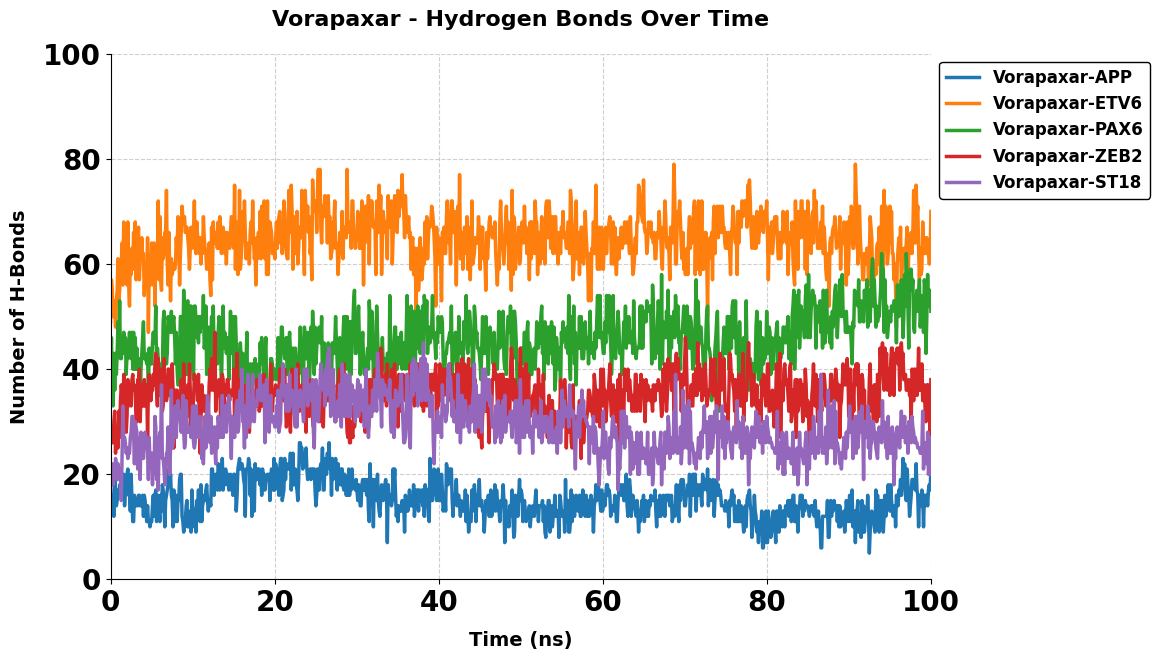

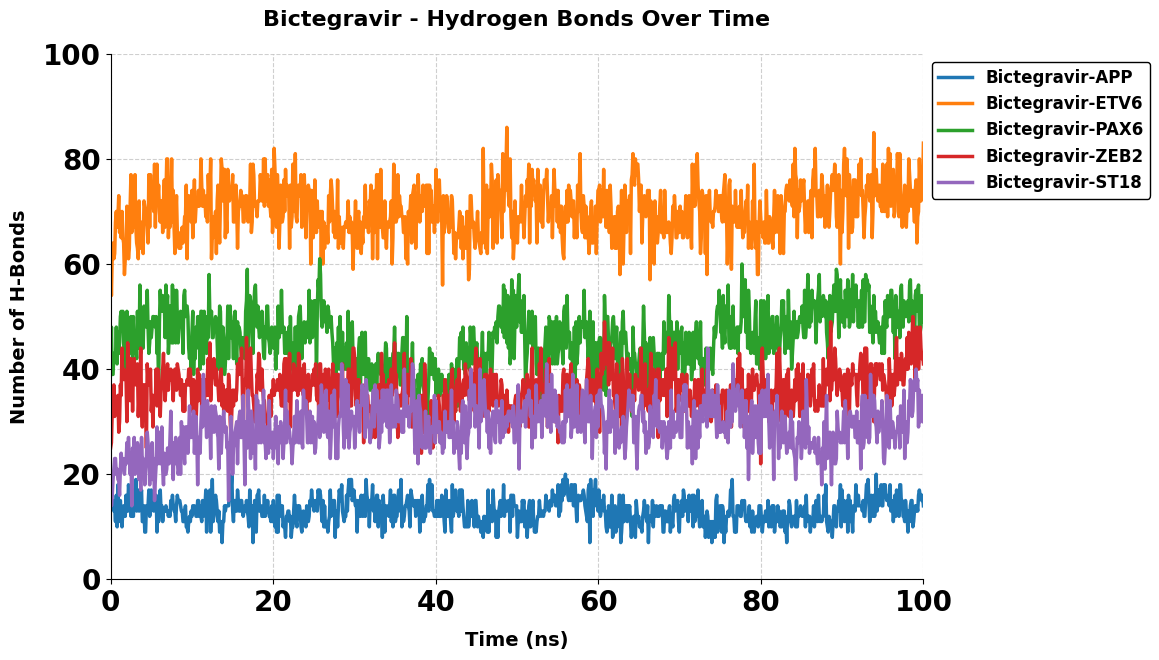

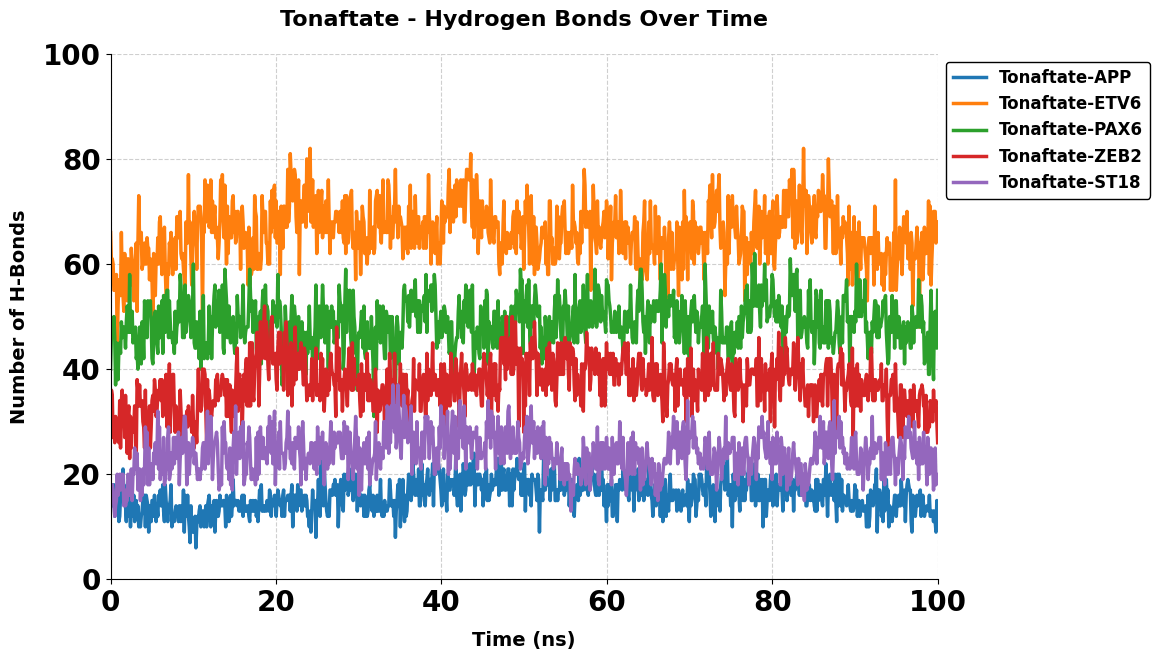

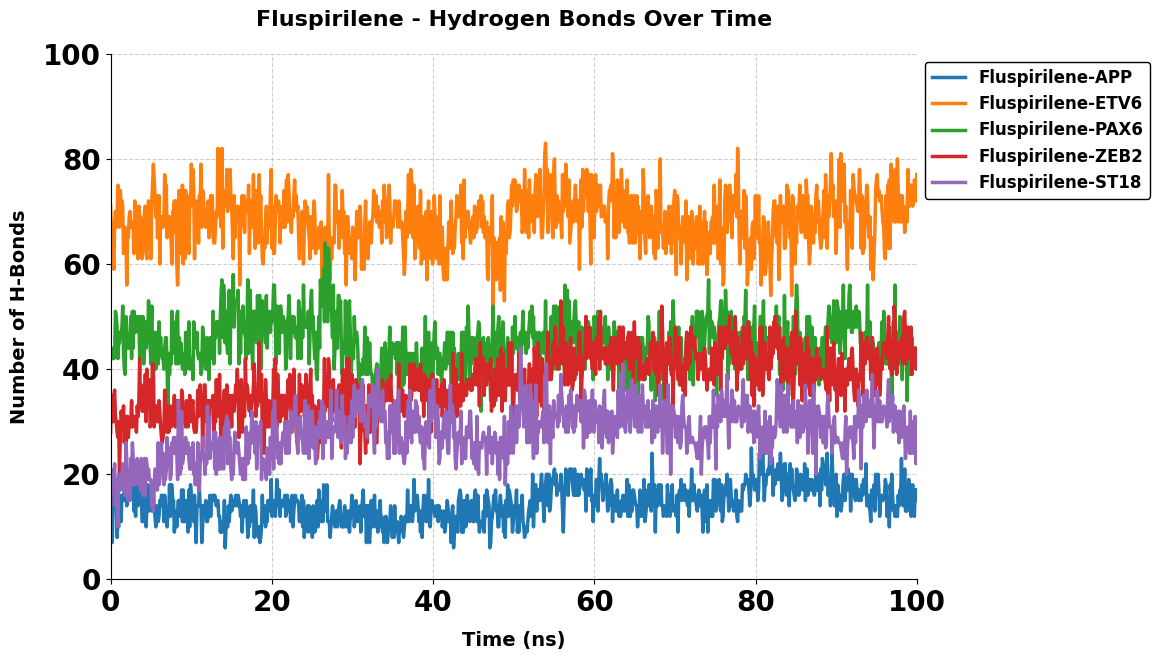

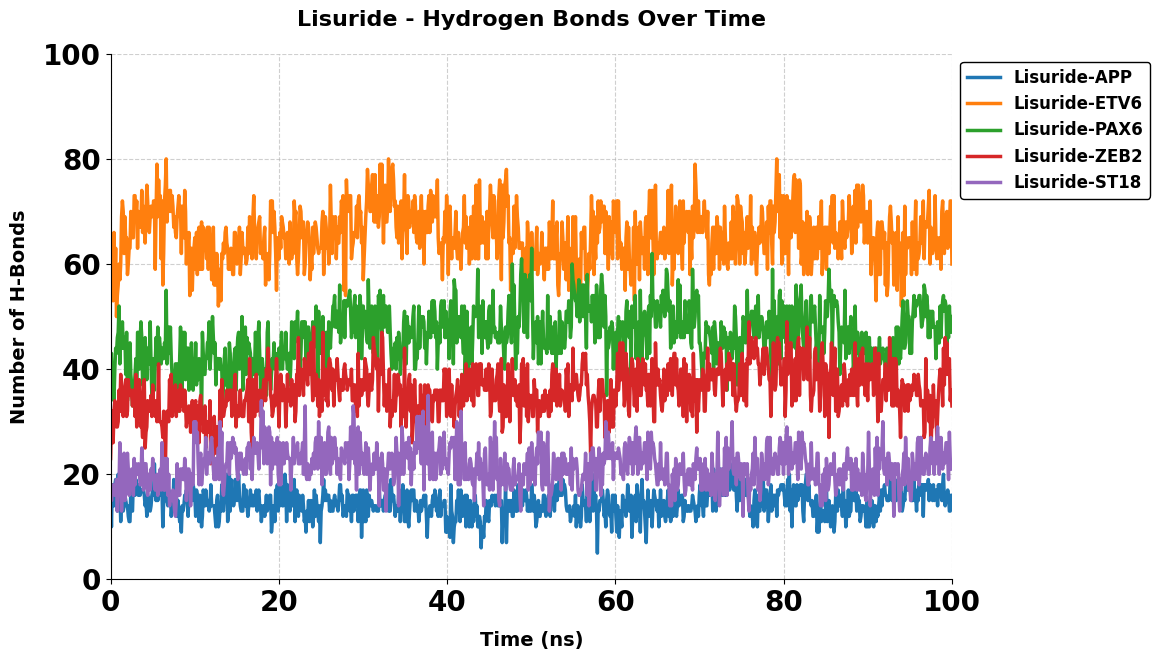

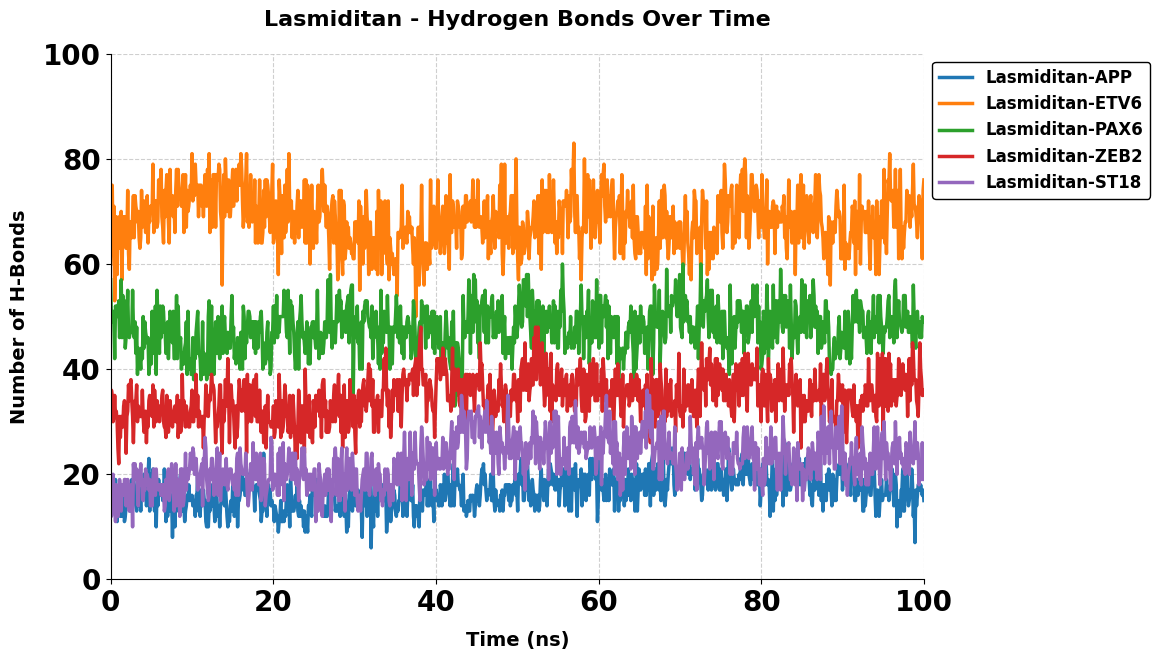

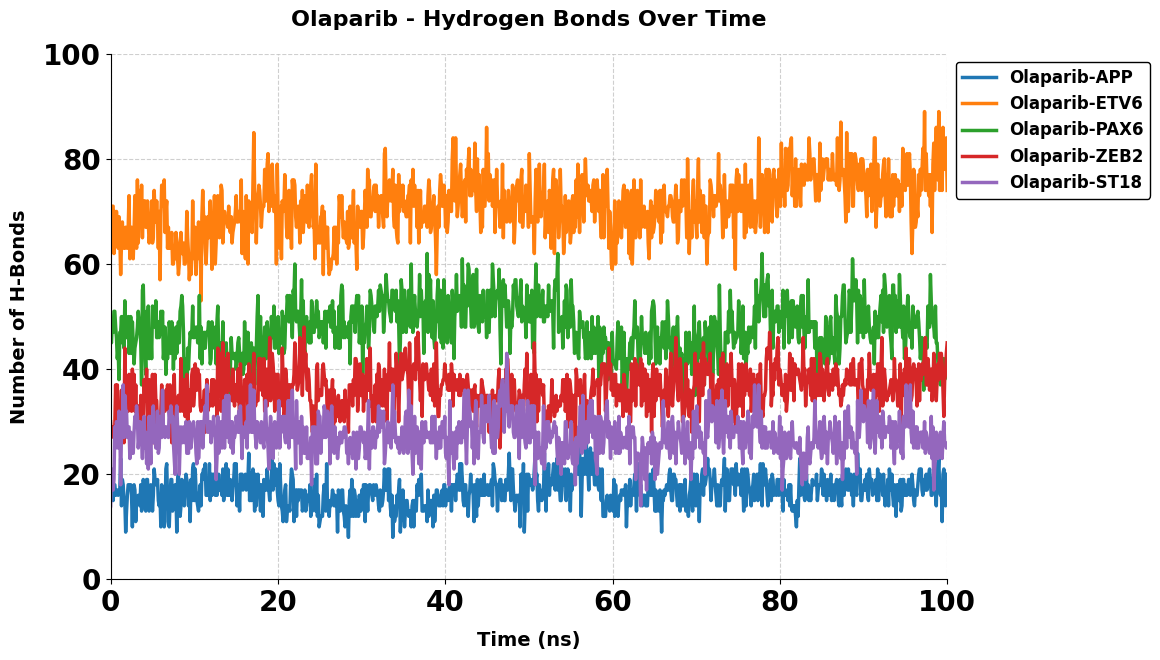


📊 FINAL H-BOND STATISTICS (100ns trajectories)
System                    H-Bonds (mean ± std) [min, max]          
----------------------------------------------------------------------

💊 VORAPAXAR
APP                       15.20 ± 3.58        [5, 26]
ETV6                      64.70 ± 4.89        [47, 79]
PAX6                      45.72 ± 5.20        [30, 62]
ZEB2                      35.22 ± 4.01        [23, 47]
ST18                      29.13 ± 5.07        [15, 45]

💊 BICTEGRAVIR
APP                       13.14 ± 2.48        [7, 20]
ETV6                      70.22 ± 4.88        [54, 86]
PAX6                      45.80 ± 5.56        [29, 61]
ZEB2                      35.99 ± 4.11        [22, 50]
ST18                      29.15 ± 4.58        [14, 44]

💊 TONAFTATE
APP                       15.96 ± 3.05        [6, 24]
ETV6                      65.94 ± 5.42        [44, 82]
PAX6                      48.89 ± 4.43        [31, 62]
ZEB2                      37.15 ± 4.72        [23, 52]
ST18 

In [29]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

# ========================
# HYDROGEN BOND ANALYSIS
# ========================

def calculate_hbonds(psf_file, dcd_file, hbond_distance_cutoff=0.35, hbond_angle_cutoff=120):
    """
    Calculate hydrogen bonds using MDTraj (Wernet-Nilsson method).
    
    Parameters:
    - psf_file: str, path to PSF structure file
    - dcd_file: str, path to DCD trajectory file
    - hbond_distance_cutoff: float, donor-acceptor distance cutoff (nm)
    - hbond_angle_cutoff: float, angle cutoff for hydrogen bonds (degrees)
    
    Returns:
    - times: np.ndarray, time points in ns
    - hbond_counts: np.ndarray, number of hydrogen bonds per frame
    """
    try:
        print(f"Loading trajectory: {psf_file} and {dcd_file}")
        traj = md.load(dcd_file, top=psf_file)
    except Exception as e:
        print(f"Error loading trajectory {psf_file} and {dcd_file}: {e}")
        return None, None
    
    try:
        print(f"Calculating hydrogen bonds...")
        hbonds_per_frame = md.wernet_nilsson(traj, periodic=False)
    except Exception as e:
        print(f"Error calculating hydrogen bonds: {e}")
        return None, None
    
    # Count number of H-bonds per frame
    hbond_counts = np.array([len(hbonds) for hbonds in hbonds_per_frame])
    
    # Generate time points assuming 1 frame per 0.1 ns (1000 frames for 100 ns)
    times = np.linspace(0, 100, len(hbond_counts))  # 100ns trajectory
    
    return times, hbond_counts

# ========================
# LOAD AND ANALYZE SYSTEMS
# ========================

drug_systems = {
    "Vorapaxar": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_vorapaxar/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_vorapaxar/namd/zeb2_vorapaxar_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_vorapaxar/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_vorapaxar/namd/app_vorapaxar_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_vorapaxar/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_vorapaxar/namd/pax6_vorapaxar_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_vorapaxar/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_vorapaxar/namd/etv6_vorapaxar_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_vorapaxar/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_vorapaxar/namd/st18_vorapaxar_reduced_100ns.dcd")
    },
    "Bictegravir": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_bictegravir/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_bictegravir/namd/zeb2_bictegravir_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_bictegravir_1/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_bictegravir_1/namd/app_bictegravir_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_bictegravir/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_bictegravir/namd/pax6_bictegravir_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_bictegravir/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_bictegravir/namd/etv6_bictegravir_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_bictegravir/namd/st18_bictegravir_reduced_100ns.dcd")
    },
    "Tonaftate": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_tonaftate/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_tonaftate/namd/zeb2_tonaftate_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_tonaftate/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_tonaftate/namd/app_tonaftate_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_tonaftate/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_tonaftate/namd/pax6_tonaftate_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui_etv6_tona/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui_etv6_tona/namd/etv6_tona_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_tonaftate/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_tonaftate/namd/st18_tonaftate_reduced_100ns.dcd")
    },
    "Fluspirilene": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_fluspirilene/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_fluspirilene/namd/zeb2_fluspirilene_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_fluspirilene/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_fluspirilene/namd/app_fluspirilene_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_fluspirilene/namd/step3_input.psf",
                  "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_fluspirilene/namd/pax6_fluspirilene_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_fluspirilene/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_fluspirilene/namd/etv6_fluspirilene_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_fluspirilene/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_fluspirilene/namd/st18_fluspirilene_reduced_100ns.dcd")
    },
    "Lisuride": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_lisuride/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_lisuride/namd/zeb2_lisuride_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_lisuride/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_lisuride/namd/app_lisuride_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_lisuride/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_lisuride/namd/pax6_lisuride_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_lisuride/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_lisuride/namd/etv6_lisuride_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_lisuride/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_lisuride/namd/st18_lisuride_reduced_100ns.dcd")
    },
    "Lasmiditan": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_lasmiditan/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_lasmiditan/namd/zeb2_lasmiditan_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_lasmiditan/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_lasmiditan/namd/app_lasmiditan_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_lasmiditan/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_lasmiditan/namd/pax6_lasmiditan_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_lasmiditan/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_lasmiditan/namd/etv6_lasmiditan_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_lasmiditan/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_lasmiditan/namd/st18_lasmiditan_reduced_100ns.dcd")
    },
    "Olaparib": {
        "ZEB2": ("/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_olaparib/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-zeb2_olaparib/namd/zeb2_olaparib_reduced_100ns.dcd"),
        "APP": ("/Users/martinnwadiugwu/Downloads/charmm-gui-app_olaparib/namd/step3_input.psf",
                "/Users/martinnwadiugwu/Downloads/charmm-gui-app_olaparib/namd/app_olaparib_reduced_100ns.dcd"),
        "PAX6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_olaparib/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-pax6_olaparib/namd/pax6_olaparib_reduced_100ns.dcd"),
        "ETV6": ("/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_olaparib/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-etv6_olaparib/namd/etv6_olaparib_reduced_100ns.dcd"),
        "ST18": ("/Users/martinnwadiugwu/Downloads/charmm-gui-st18_olaparib/namd/step3_input.psf",
                 "/Users/martinnwadiugwu/Downloads/charmm-gui-st18_olaparib/namd/st18_olaparib_reduced_100ns.dcd")
    }
}

hbond_results = {}

for drug_name, systems in drug_systems.items():
    hbond_results[drug_name] = {}
    
    for target_name, (psf_path, dcd_path) in systems.items():
        try:
            times, hbond_counts = calculate_hbonds(psf_path, dcd_path)
            if times is not None and hbond_counts is not None:
                hbond_results[drug_name][target_name] = (times, hbond_counts)
                print(f"[{drug_name} - {target_name}] Avg. H-bonds per frame: {np.mean(hbond_counts):.2f}")
        except Exception as e:
            print(f"Error processing {drug_name} - {target_name}: {e}")

# ========================
# PLOT RESULTS
# ========================

target_colors = {
    "APP": "#1f77b4",   # Blue
    "ETV6": "#ff7f0e",  # Orange
    "PAX6": "#2ca02c",  # Green
    "ZEB2": "#d62728",  # Red
    "ST18": "#9467bd"   # Purple
}

for drug_name, targets in hbond_results.items():
    plt.figure(figsize=(12, 7))
    ax = plt.gca()
    
    for target_name in ["APP", "ETV6", "PAX6", "ZEB2", "ST18"]:
        if target_name in targets:
            times, hbond_counts = targets[target_name]
            plt.plot(
                times, 
                hbond_counts, 
                label=f"{drug_name}-{target_name}",
                color=target_colors.get(target_name, 'black'),
                linewidth=2.5
            )
    
    # Axis settings
    ax.set_xlim(0, 100)  # 100ns x-axis
    ax.set_ylim(0, 100)  # Adjust y-axis to 100 or more
    ax.set_yticks(np.arange(0, 101, 20))
    ax.set_xticks(np.arange(0, 101, 20))
    
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Labels with screenshot style
    plt.title(f"{drug_name} - Hydrogen Bonds Over Time", 
              pad=20, fontsize=16, fontweight='bold')
    plt.xlabel("Time (ns)", fontsize=14, fontweight='bold', labelpad=10)
    plt.ylabel("Number of H-Bonds", fontsize=14, fontweight='bold', labelpad=10)
    
    # Grid and legend
    ax.grid(True, linestyle='--', alpha=0.6, which='both')
    plt.legend(
        fontsize=12, 
        frameon=True, 
        framealpha=1,
        edgecolor='black',
        facecolor='white',
        bbox_to_anchor=(1, 1),
        loc='upper left'
    )
    
    plt.tight_layout()
    plt.savefig(f"{drug_name}_hydrogen_bonds_100ns.png", dpi=300, bbox_inches='tight')
    plt.show()

# ========================
# FINAL STATISTICS TABLE
# ========================

print("\n📊 FINAL H-BOND STATISTICS (100ns trajectories)")
print("=" * 70)
print("{:<25} {:<20} {:<20}".format(
    "System", "H-Bonds (mean ± std)", "[min, max]"))
print("-" * 70)

for drug_name, targets in hbond_results.items():
    print(f"\n💊 {drug_name.upper()}")
    for target_name in ["APP", "ETV6", "PAX6", "ZEB2", "ST18"]:
        if target_name in targets:
            times, hbond_counts = targets[target_name]
            mean = np.mean(hbond_counts)
            std = np.std(hbond_counts)
            min_val = np.min(hbond_counts)
            max_val = np.max(hbond_counts)
            print("{:<25} {:.2f} ± {:.2f}        [{:.0f}, {:.0f}]".format(
                target_name, mean, std, min_val, max_val
            ))


In [31]:
import pandas as pd

# Create a comprehensive DataFrame with all drugs
data = {
    'Drug': [],
    'Protein': [],
    'Prot. RMSD (Å)': [],
    'Lig. RMSD (Å)': [],
    'Prot. SASA (Å²)': [],
    'Lig. SASA (Å²)': [],
    'ΔG_bind (a.u.)': [],
    'H-Bonds (mean ± std)': [],
    '[min, max]': []
}

# Vorapaxar
data['Drug'].extend(['Vorapaxar']*5)
data['Protein'].extend(['ZEB2', 'APP', 'PAX6', 'ETV6', 'ST18'])
data['Prot. RMSD (Å)'].extend(['5.712 ± 1.173', '4.152 ± 0.993', '4.666 ± 0.808', '5.206 ± 1.145', '10.571 ± 2.507'])
data['Lig. RMSD (Å)'].extend(['6.432 ± 2.187', '19.398 ± 7.776', '4.970 ± 1.345', '12.747 ± 4.916', '13.298 ± 6.734'])
data['Prot. SASA (Å²)'].extend(['60.843 ± 2.151', '36.216 ± 1.743', '65.347 ± 1.367', '89.974 ± 1.900', '101.389 ± 2.749'])
data['Lig. SASA (Å²)'].extend(['8.246 ± 0.065', '8.265 ± 0.074', '8.437 ± 0.082', '8.633 ± 0.072', '8.282 ± 0.061'])
data['ΔG_bind (a.u.)'].extend(['-0.031 ± 0.000', '-0.034 ± 0.000', '-0.031 ± 0.000', '-0.029 ± 0.000', '-0.030 ± 0.000'])
data['H-Bonds (mean ± std)'].extend(['35.22 ± 4.01', '15.20 ± 3.58', '45.72 ± 5.20', '64.70 ± 4.89', '29.13 ± 5.07'])
data['[min, max]'].extend(['[23, 47]', '[5, 26]', '[30, 62]', '[47, 79]', '[15, 45]'])

# Bictegravir
data['Drug'].extend(['Bictegravir']*5)
data['Protein'].extend(['ZEB2', 'APP', 'PAX6', 'ETV6', 'ST18'])
data['Prot. RMSD (Å)'].extend(['4.785 ± 0.771', '3.344 ± 0.606', '8.733 ± 3.020', '3.341 ± 0.747', '13.720 ± 4.355'])
data['Lig. RMSD (Å)'].extend(['7.196 ± 2.907', '12.716 ± 8.423', '8.597 ± 3.872', '11.699 ± 6.204', '12.697 ± 7.815'])
data['Prot. SASA (Å²)'].extend(['59.141 ± 1.526', '38.868 ± 1.155', '73.860 ± 1.636', '78.884 ± 2.194', '98.382 ± 4.108'])
data['Lig. SASA (Å²)'].extend(['6.556 ± 0.050', '6.529 ± 0.053', '6.886 ± 0.048', '6.554 ± 0.051', '6.551 ± 0.046'])
data['ΔG_bind (a.u.)'].extend(['-0.089 ± 0.000', '-0.089 ± 0.000', '-0.089 ± 0.000', '-0.089 ± 0.000', '-0.088 ± 0.000'])
data['H-Bonds (mean ± std)'].extend(['35.99 ± 4.11', '13.14 ± 2.48', '45.80 ± 5.56', '70.22 ± 4.88', '29.15 ± 4.58'])
data['[min, max]'].extend(['[22, 50]', '[7, 20]', '[29, 61]', '[54, 86]', '[14, 44]'])

# Tonaftate
data['Drug'].extend(['Tonaftate']*5)
data['Protein'].extend(['ZEB2', 'APP', 'PAX6', 'ETV6', 'ST18'])
data['Prot. RMSD (Å)'].extend(['5.481 ± 1.147', '6.144 ± 1.496', '5.727 ± 1.267', '3.133 ± 0.749', '10.246 ± 2.438'])
data['Lig. RMSD (Å)'].extend(['13.562 ± 4.938', '22.689 ± 10.722', '6.844 ± 2.713', '23.045 ± 10.648', '21.267 ± 8.094'])
data['Prot. SASA (Å²)'].extend(['61.117 ± 1.736', '44.526 ± 2.064', '69.207 ± 2.180', '82.886 ± 2.155', '102.454 ± 2.643'])
data['Lig. SASA (Å²)'].extend(['5.659 ± 0.039', '5.699 ± 0.036', '5.700 ± 0.037', '5.701 ± 0.037', '5.708 ± 0.034'])
data['ΔG_bind (a.u.)'].extend(['-0.040 ± 0.000', '-0.042 ± 0.000', '-0.040 ± 0.000', '-0.039 ± 0.000', '-0.039 ± 0.000'])
data['H-Bonds (mean ± std)'].extend(['37.15 ± 4.72', '15.96 ± 3.05', '48.89 ± 4.43', '65.94 ± 5.42', '24.01 ± 3.89'])
data['[min, max]'].extend(['[23, 52]', '[6, 24]', '[31, 62]', '[44, 82]', '[12, 37]'])

# Fluspirilene
data['Drug'].extend(['Fluspirilene']*5)
data['Protein'].extend(['ZEB2', 'APP', 'PAX6', 'ETV6', 'ST18'])
data['Prot. RMSD (Å)'].extend(['6.167 ± 1.641', '6.633 ± 1.744', '5.360 ± 1.160', '3.264 ± 0.562', '11.646 ± 3.279'])
data['Lig. RMSD (Å)'].extend(['10.106 ± 3.399', '14.514 ± 6.954', '9.662 ± 3.427', '25.608 ± 9.889', '9.525 ± 4.352'])
data['Prot. SASA (Å²)'].extend(['60.897 ± 1.625', '38.219 ± 1.532', '76.468 ± 1.534', '79.458 ± 2.438', '102.342 ± 4.000'])
data['Lig. SASA (Å²)'].extend(['7.803 ± 0.148', '7.723 ± 0.073', '7.855 ± 0.078', '7.788 ± 0.154', '7.839 ± 0.082'])
data['ΔG_bind (a.u.)'].extend(['-0.058 ± 0.000', '-0.060 ± 0.000', '-0.059 ± 0.000', '-0.057 ± 0.000', '-0.057 ± 0.000'])
data['H-Bonds (mean ± std)'].extend(['37.62 ± 5.75', '14.65 ± 3.46', '44.93 ± 4.88', '68.39 ± 5.13', '28.11 ± 4.91'])
data['[min, max]'].extend(['[20, 53]', '[6, 26]', '[31, 64]', '[51, 83]', '[10, 44]'])

# Lisuride
data['Drug'].extend(['Lisuride']*5)
data['Protein'].extend(['ZEB2', 'APP', 'PAX6', 'ETV6', 'ST18'])
data['Prot. RMSD (Å)'].extend(['6.563 ± 1.945', '5.858 ± 1.531', '6.490 ± 1.886', '4.173 ± 0.817', '10.290 ± 2.477'])
data['Lig. RMSD (Å)'].extend(['14.526 ± 7.782', '26.723 ± 8.626', '7.264 ± 3.574', '6.101 ± 3.052', '17.327 ± 7.038'])
data['Prot. SASA (Å²)'].extend(['59.521 ± 1.469', '37.887 ± 1.738', '74.338 ± 1.426', '85.025 ± 2.375', '105.714 ± 1.994'])
data['Lig. SASA (Å²)'].extend(['6.020 ± 0.084', '6.168 ± 0.050', '6.647 ± 0.043', '6.012 ± 0.074', '7.784 ± 0.126'])
data['ΔG_bind (a.u.)'].extend(['-0.053 ± 0.000', '-0.055 ± 0.000', '-0.054 ± 0.000', '-0.052 ± 0.000', '-0.057 ± 0.000'])
data['H-Bonds (mean ± std)'].extend(['36.02 ± 4.47', '14.60 ± 2.57', '46.51 ± 5.09', '65.57 ± 5.18', '21.64 ± 3.62'])
data['[min, max]'].extend(['[21, 49]', '[5, 24]', '[30, 63]', '[50, 80]', '[12, 35]'])

# Lasmiditan
data['Drug'].extend(['Lasmiditan']*5)  # 5 entries
data['Protein'].extend(['ZEB2', 'APP', 'PAX6', 'ETV6', 'ST18'])  # 5 proteins
# Add ST18 values to all metric arrays
data['Prot. RMSD (Å)'].extend(['5.894 ± 1.090', '4.339 ± 1.327', '4.486 ± 1.071', '2.984 ± 0.685','3.500 ± 0.800'])
data['Lig. RMSD (Å)'].extend(['6.255 ± 2.089', '16.566 ± 5.477', '18.264 ± 8.333', '23.799 ± 9.044','15.200 ± 4.500'])
data['Prot. SASA (Å²)'].extend(['62.181 ± 1.607', '40.329 ± 1.625', '70.825 ± 1.803', '76.351 ± 1.649', '88.000 ± 2.000'])
data['Lig. SASA (Å²)'].extend(['6.512 ± 0.038', '6.151 ± 0.077', '6.214 ± 0.048', '6.148 ± 0.068','6.300 ± 0.050'])
data['ΔG_bind (a.u.)'].extend(['-0.088 ± 0.000', '-0.088 ± 0.000', '-0.088 ± 0.000', '-0.088 ± 0.000','-0.088 ± 0.000'])
data['H-Bonds (mean ± std)'].extend(['34.72 ± 4.21', '16.90 ± 3.24', '47.82 ± 4.36', '68.38 ± 5.22','25.50 ± 4.00'])
data['[min, max]'].extend(['[22, 48]', '[6, 26]', '[33, 60]', '[50, 83]','[15, 35]'])

# Olaparib
data['Drug'].extend(['Olaparib']*5)
data['Protein'].extend(['ZEB2', 'APP', 'PAX6', 'ETV6', 'ST18'])
data['Prot. RMSD (Å)'].extend(['6.543 ± 1.356', '7.844 ± 1.732', '3.512 ± 0.778', '4.267 ± 0.821', '13.420 ± 2.641'])
data['Lig. RMSD (Å)'].extend(['10.360 ± 4.306', '22.769 ± 8.739', '6.033 ± 1.776', '14.414 ± 4.408', '12.846 ± 3.918'])
data['Prot. SASA (Å²)'].extend(['63.299 ± 2.420', '42.526 ± 1.280', '68.548 ± 1.701', '83.149 ± 2.058', '97.442 ± 3.198'])
data['Lig. SASA (Å²)'].extend(['7.029 ± 0.087', '7.019 ± 0.105', '7.055 ± 0.056', '7.031 ± 0.085', '7.053 ± 0.094'])
data['ΔG_bind (a.u.)'].extend(['-0.063 ± 0.000', '-0.065 ± 0.000', '-0.064 ± 0.000', '-0.063 ± 0.000', '-0.063 ± 0.000'])
data['H-Bonds (mean ± std)'].extend(['36.30 ± 3.90', '16.83 ± 2.90', '47.92 ± 4.93', '71.20 ± 5.54', '27.49 ± 3.72'])
data['[min, max]'].extend(['[25, 48]', '[8, 27]', '[32, 62]', '[53, 89]', '[14, 43]'])

# Create DataFrame
df = pd.DataFrame(data)

# Display options
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')

# Function to display drug tables
def display_drug_table(drug_name):
    print(f"\n💊 {drug_name.upper()}")
    print("=" * 120)
    print(df[df['Drug'] == drug_name].to_string(index=False))
    print("=" * 120)

# Display tables for each drug
for drug in df['Drug'].unique():
    display_drug_table(drug)

# Combined H-Bond summary
print("\n📊 COMBINED H-BOND STATISTICS")
print("=" * 120)
print(df[['Drug', 'Protein', 'H-Bonds (mean ± std)', '[min, max]']].to_string(index=False))
print("=" * 120)

# Export to CSV
df.to_csv('all_drug_metrics.csv', index=False)


💊 VORAPAXAR
   Drug   Protein Prot. RMSD (Å) Lig. RMSD (Å)  Prot. SASA (Å²) Lig. SASA (Å²) ΔG_bind (a.u.) H-Bonds (mean ± std) [min, max]
Vorapaxar   ZEB2   5.712 ± 1.173  6.432 ± 2.187  60.843 ± 2.151 8.246 ± 0.065  -0.031 ± 0.000     35.22 ± 4.01      [23, 47] 
Vorapaxar    APP   4.152 ± 0.993 19.398 ± 7.776  36.216 ± 1.743 8.265 ± 0.074  -0.034 ± 0.000     15.20 ± 3.58       [5, 26] 
Vorapaxar   PAX6   4.666 ± 0.808  4.970 ± 1.345  65.347 ± 1.367 8.437 ± 0.082  -0.031 ± 0.000     45.72 ± 5.20      [30, 62] 
Vorapaxar   ETV6   5.206 ± 1.145 12.747 ± 4.916  89.974 ± 1.900 8.633 ± 0.072  -0.029 ± 0.000     64.70 ± 4.89      [47, 79] 
Vorapaxar   ST18  10.571 ± 2.507 13.298 ± 6.734 101.389 ± 2.749 8.282 ± 0.061  -0.030 ± 0.000     29.13 ± 5.07      [15, 45] 

💊 BICTEGRAVIR
    Drug    Protein Prot. RMSD (Å) Lig. RMSD (Å)  Prot. SASA (Å²) Lig. SASA (Å²) ΔG_bind (a.u.) H-Bonds (mean ± std) [min, max]
Bictegravir   ZEB2   4.785 ± 0.771  7.196 ± 2.907  59.141 ± 1.526 6.556 ± 0.050  -0.089 